In [78]:
# https://github.com/jeffalstott/powerlaw

# https://stats.stackexchange.com/questions/155552/what-does-log-uniformly-distribution-mean

# https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.stats import powerlaw

SITTING_THRESHOLD = 0.5  # TODO: choose unit real cm
BINS = 30   # TODO: grid search

### Load Trajectories (or preproc)

In [17]:
def open_preprocessed_data(fname):
    import pickle
    with open(fname, 'rb') as inp:
        sub_trajs_list = pickle.load(inp)
    return sub_trajs_list

# Open pre-processed files (or use preproc functions for raw data)
PATH = 'preprocessed_dataset/'
dfs_names = ['tr11', 'tr12', 'tr2','tr3','tr4','tr5','tr6','tr7', 'tr91'] # ,'tr92'


df_dict_subtraj = {}
for tr_name in dfs_names:
    tr = open_preprocessed_data(PATH + tr_name + '.pkl')
    df_dict_subtraj[tr_name] = tr

df_dict = {}
for k, df in df_dict_subtraj.items():
    df_dict[k] = pd.concat(df)

In [57]:
# df_dict['tr3'].head(50)
# TODO: roll 'step_length' column to the i-1 !!!

time          x          y      angles  delta_angle  step_length  \
0    1.0010  -2.399949  -0.949371    0.000000     0.000000     0.000000   
1    1.3025  -2.462182  -0.735218  343.796298   343.796298     0.223013   
2    1.6040  -2.352719   0.331526    5.858822    22.062524     1.072345   
3    1.9055   0.000695   0.665046   81.933921    76.075099     2.376930   
4    2.2070   2.790567   1.533511   72.709034   350.775113     2.921919   
5    2.5085   2.527265   1.969741  328.885416   256.176382     0.509533   
6    2.8100   3.569847   3.532229   33.713507    64.828090     1.878389   
7    3.1115   5.357637   6.800271   28.680967   354.967460     3.725090   
8    3.4130   7.191274  10.034985   29.547264     0.866297     3.718279   
9    3.7145   8.772848  12.176425   36.447958     6.900695     2.662168   
10   4.0160   9.468387  13.591852   26.169452   349.721494     1.577088   
11   4.3175   9.612075  15.118154    5.378014   339.208562     1.533051   
12   4.6190   9.279635  15.088996  264.987494   259.609480     0.333716   
13   4.9205   8.683063  14.398741  220.836108   315.848613     0.912332   
14   5.2220   7.468404  14.076673  255.149692    34.313584     1.256632   
15   5.5235   6.421431  14.441329  289.202976    34.053284     1.108660   
16   5.8250   4.468513  15.185207  290.852138     1.649162     2.089795   
17   6.1265   1.709454  16.835996  300.892757    10.040619     3.215200   
18   6.4280  -3.079577  18.997152  294.288323   353.395566     5.254085   
19   6.7295  -8.130524  20.298723  284.450099   350.161776     5.215951   
20   7.0310 -12.949601  21.363589  282.460357   358.010258     4.935326   
21   7.3325 -17.958783  22.633075  284.221153     1.760796     5.167543   
22   7.6340 -23.078126  24.238846  287.414941     3.193788     5.365275   
23   7.9355 -27.747951  25.439248  284.416052   357.001111     4.821642   
24   8.2370 -33.079634  26.549585  281.763861   357.347809     5.446071   
25   8.5385 -36.939254  27.894554  289.212003     7.448143     4.087249   
0   30.4970 -38.400034  36.614868    0.000000     0.000000     0.000000   
1   30.7985 -37.039978  37.940986   45.723852    45.723852     1.899563   
2   31.1000 -36.521540  38.764730   32.185013   346.461162     0.973310   
3   31.4015 -36.924971  38.780245  272.202390   240.017377     0.403729   
4   31.7030 -37.123224  38.758978  263.877308   351.674918     0.199391   
5   32.0045 -37.279888  38.679249  243.027692   339.150384     0.175785   
6   32.3060 -37.456694  38.724985  284.503316    41.475625     0.182626   
7   32.6075 -37.794307  38.762069  276.268237   351.764921     0.339643   
8   32.9090 -38.079872  38.838471  284.978528     8.710291     0.295609   
9   33.2105 -38.079872  38.679249  180.000000   255.021472     0.159222   
10  33.5120 -38.079872  38.679249    0.000000   180.000000     0.000000   
11  33.8135 -38.387886  38.844016  298.143796   298.143796     0.349315   
12  34.1150 -38.320627  38.835390   97.308377   159.164581     0.067810   
13  34.4165 -38.160123  38.762069  114.551959    17.243582     0.176458   
14  34.7180 -38.110041  38.813209   44.400983   289.849024     0.071579   
15  35.0195 -38.000465  38.844016   74.296752    29.895769     0.113825   
16  35.3210 -37.908748  38.926836   47.918118   333.621366     0.123576   
17  35.6225 -37.808019  38.960150   71.699190    23.781072     0.106095   
0   72.1390 -38.960106  38.018438    0.000000     0.000000     0.000000   
1   72.4405 -38.960106  38.596430    0.000000     0.000000     0.577992   
2   72.7420 -39.081993  38.220397  197.959401   197.959401     0.395294   
3   73.0435 -39.120610  38.036808  191.878821   353.919420     0.187606   
4   73.3450 -39.120610  37.853671  180.000000   348.121179     0.183137   
5   73.6465 -38.960106  38.248320   22.131553   202.131553     0.426039   

    near_wall  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10   

Dropped: 2952 points


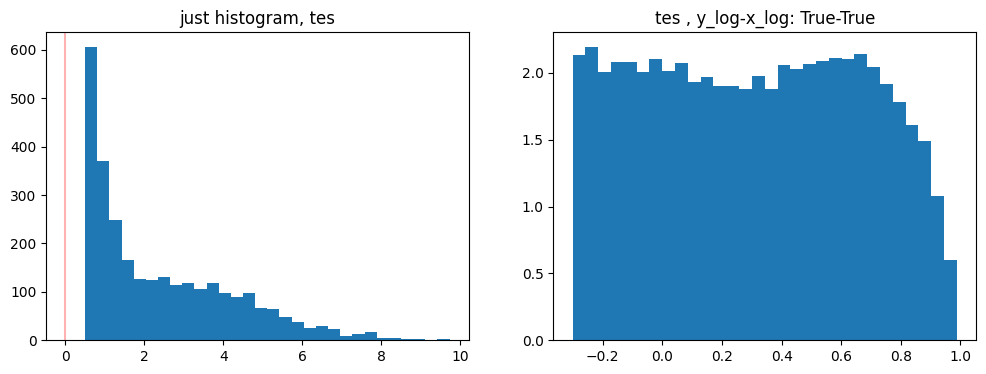

In [18]:
def plot_step_lens_hist(df, binn, hist_title,
                        y_log=True, x_log=False):
    dx = df['x'].diff()
    dy = df['y'].diff()
    dx.iloc[0], dy.iloc[0] = 0., 0.

    ## Ignore gaps in recording (== 0.)
    mask = dx.index != 0
    dx = dx * 1*mask
    dy = dy * 1*mask    

    xy = (dx**2 + dy**2)**0.5
    before = xy.shape[0]
    xy = xy[xy >= SITTING_THRESHOLD]
    print(f'Dropped: {before - xy.shape[0]} points')

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].hist(xy, bins=binn)
    ax[0].axvline(0, alpha=0.3, c='red')
    ax[0].set_title(f'just histogram, {hist_title}')

    xy = np.log10(xy) if x_log else xy

    hist, bin_edges = np.histogram(xy, bins=binn)
    if y_log:
        hist = np.log10(hist)
    ax[1].bar(bin_edges[:-1], hist, align='edge', width=np.diff(bin_edges))
    ax[1].set_title(f'{hist_title} , y_log-x_log: {y_log}-{x_log}')
    plt.show()

    return hist, bin_edges

h, xybins = plot_step_lens_hist(df_dict['tr11'], BINS, 'tes', y_log=True, x_log=True)

# убывание в лог лог по параболе??? - нет, у японца кст по параболе, если присмотрется
# в просто коррдинатах это log нормальное распределение 
# TODO: POWER LAW! - gives us nothing, actually :)
# Meaningful insight: mouse sits a lot (или просто шебуршит на месте),
# and if it moves, the steps len is uniformly distributed according to log-log hist 

# Fit power law and power law with bias and check the quality of fit

Dropped: 2952 points


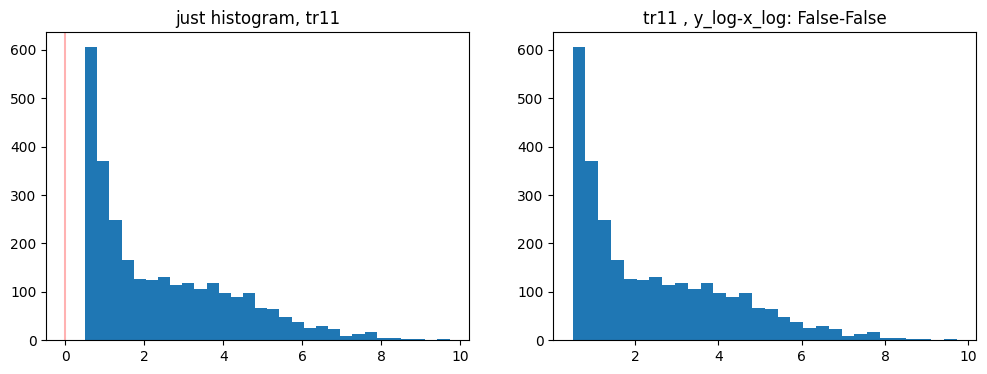

Dropped: 3268 points


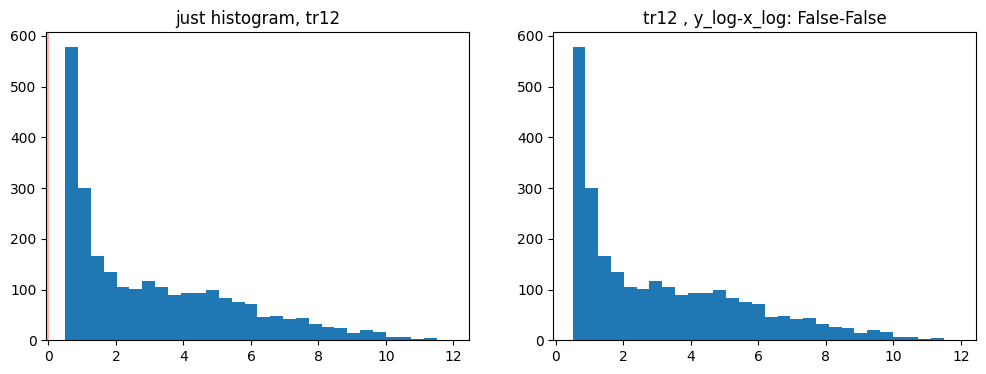

Dropped: 3817 points


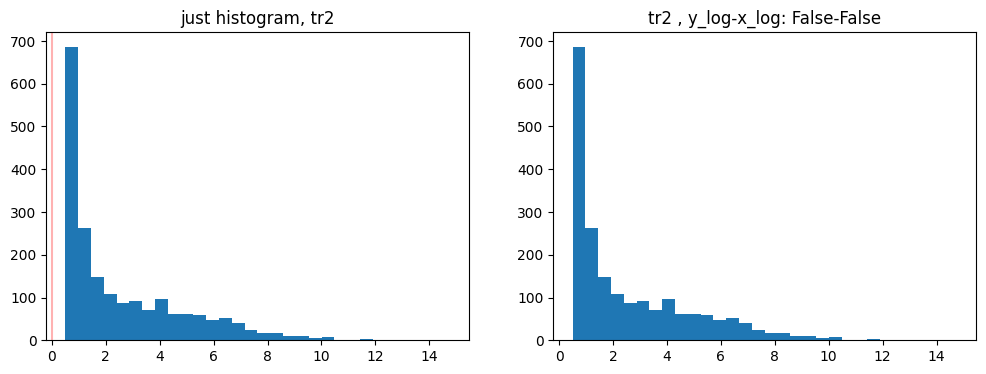

Dropped: 971 points


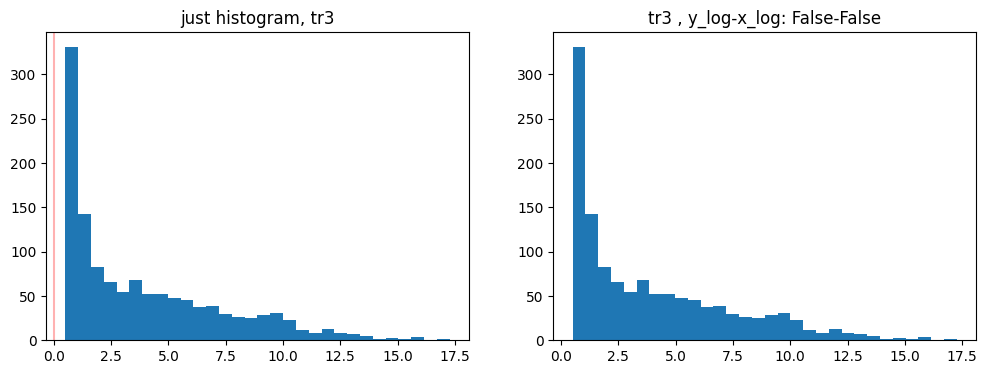

Dropped: 277 points


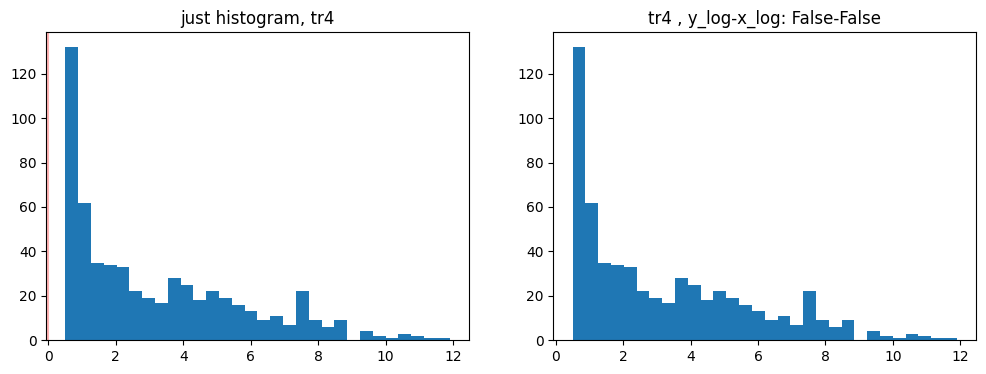

Dropped: 908 points


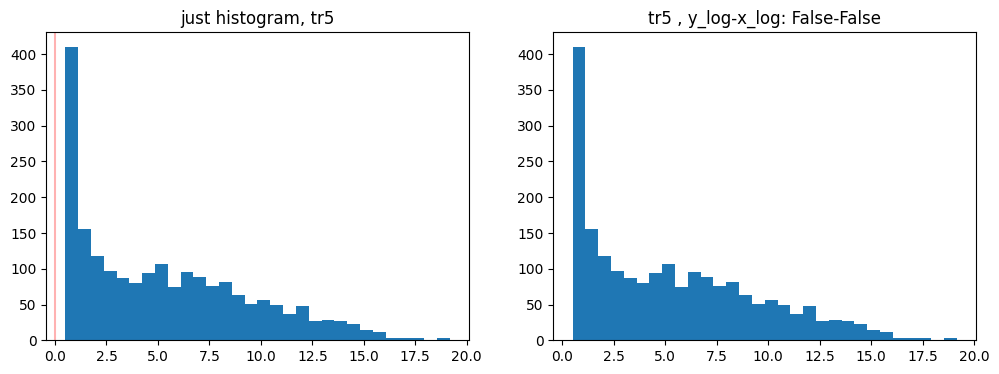

Dropped: 2077 points


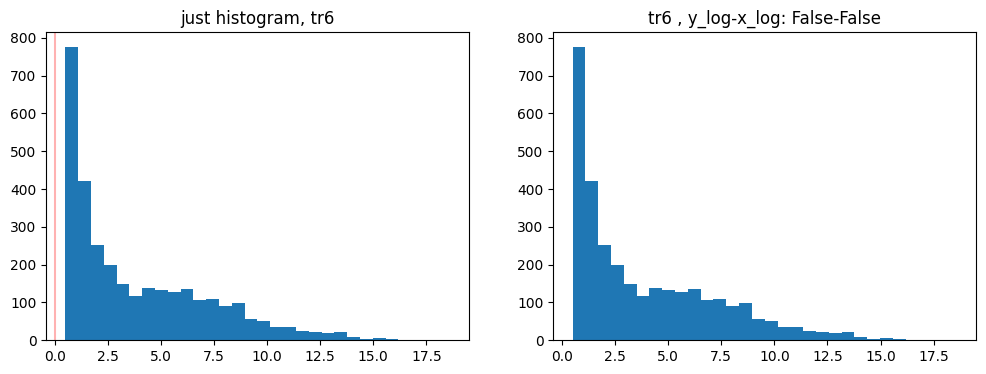

Dropped: 1744 points


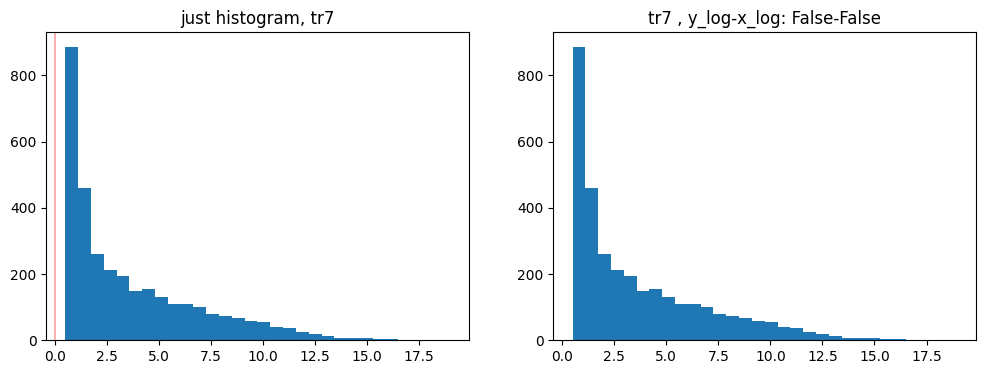

Dropped: 2693 points


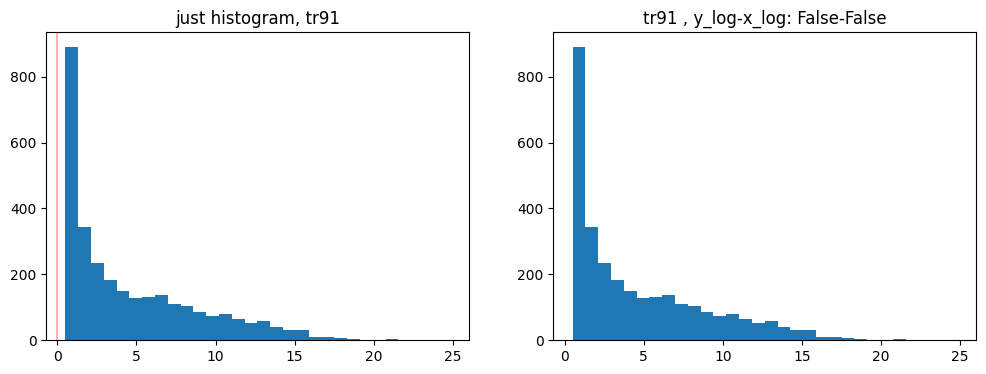

In [29]:
df_steps_hist = {}
for k, df in df_dict.items():

    h, xybins = plot_step_lens_hist(df, 30, k , y_log=False, x_log=False)
    df_steps_hist[k] = [h, xybins]

    # TODO: what is the name of x-axis ??? len of area len units ???
    # TODO: threshold for dropping "sitting" column
    # TODO: should take not so many bins for proper generalization 

In [5]:
# TODO: fit linear with log-log, compare using AIC, BIC, etc
# https://sci-hub.ru/10.1007/s10867-015-9406-z

# NOTE: for now we use likelihood with scipy.stats

In [23]:
def power_law(x, m, c):
    return c * x**m

def powerlaw_with_bias(x, m, c, c0):
    return c * x**m + c0

def exp_law(x, m, c):
    return m * np.exp(-m*(x-c))
    # return c * np.exp(m*x)

(2866,)
for tr11:
(0.4340690015640225, 0.5000025427285094, 9.225244448732338)


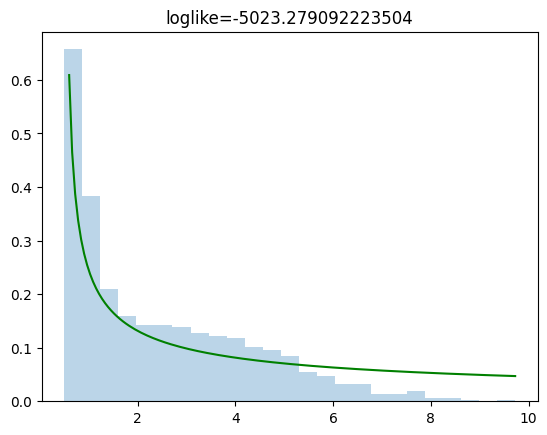

(2546,)
for tr12:
(0.44371098241869833, 0.5006391969259143, 11.384289715020524)


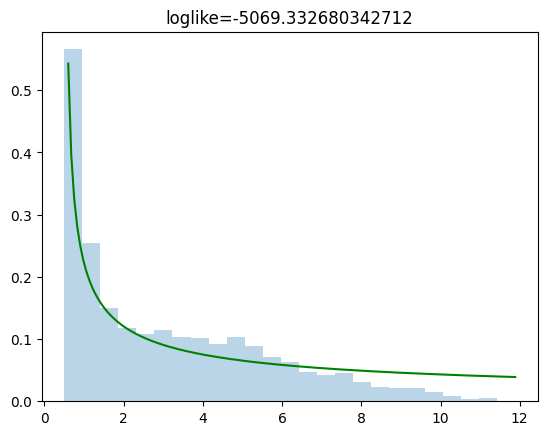

(1971,)
for tr2:
(0.35349670061675736, 0.5005168122589723, 14.253795952949554)


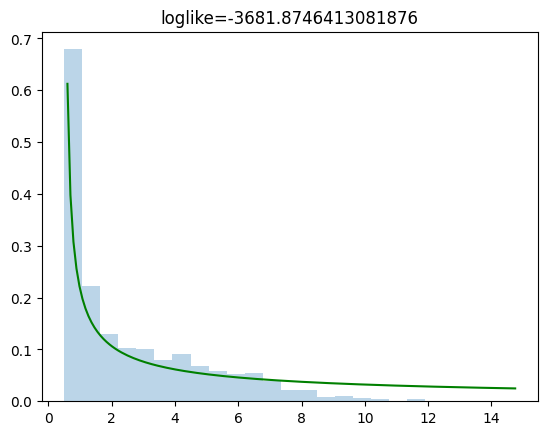

(1243,)
for tr3:
(0.4015713418362206, 0.5017707065725597, 16.77160158992455)


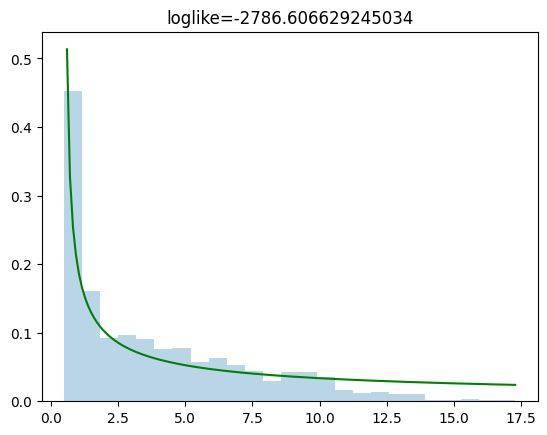

(582,)
for tr4:
(0.4432161420962047, 0.5032787277109717, 11.395768348449772)


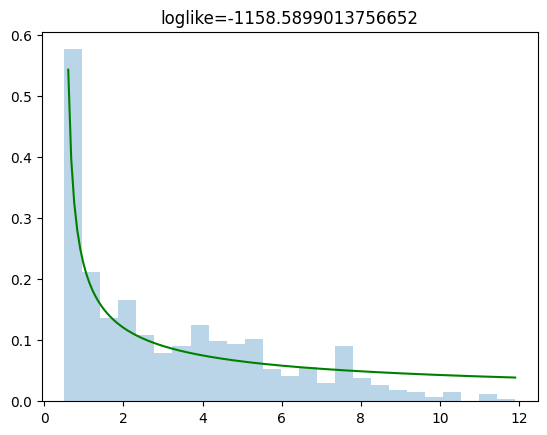

(2013,)
for tr5:
(0.4794603504313488, 0.5006259067357063, 18.66887524918441)


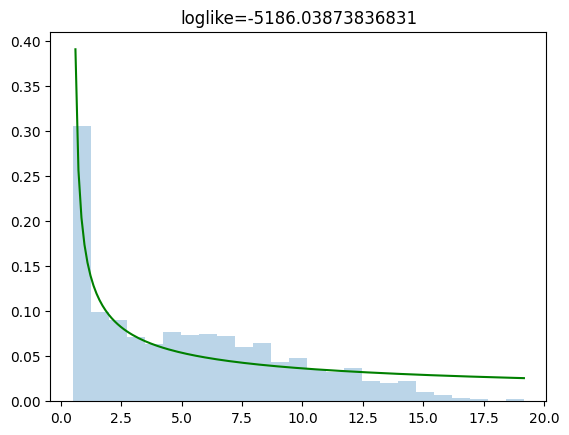

(3143,)
for tr6:
(0.41136287651049414, 0.5012646986035068, 18.09330093931977)


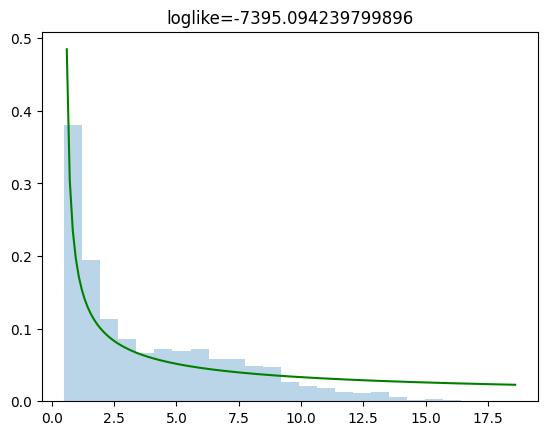

(3266,)
for tr7:
(0.3932730985721851, 0.5005855720638663, 18.457291423540266)


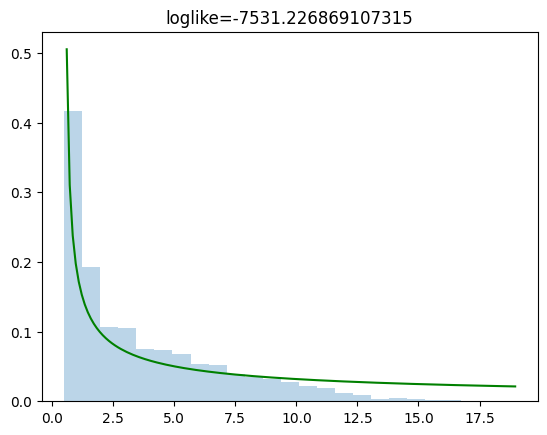

(2966,)
for tr91:
(0.38390572411300766, 0.5021428983875861, 24.295604638931668)


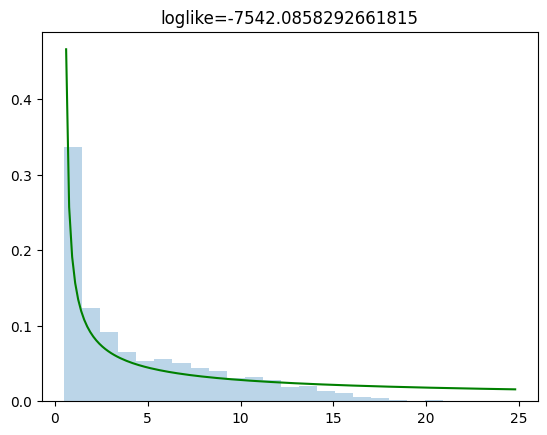

In [25]:
from scipy.stats import powerlaw

for k, df in df_dict.items():
    # dx = df['x'].diff()
    # dy = df['y'].diff()
    # dx.iloc[0], dy.iloc[0] = 0., 0.

    # ## Ignore gaps in recording (== 0.)
    # mask = dx.index != 0
    # dx = dx * 1*mask
    # dy = dy * 1*mask    

    # xy = (dx**2 + dy**2)**0.5
    # print(xy.shape)
    xy = df['step_length']
    xy = xy[xy >= SITTING_THRESHOLD]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    print(xy.shape)

    print(f'for {k}:')

    exp_est = 1.0
    x0_est = 0.
    scale_est = 1.
    sol1 = powerlaw.fit(xy, exp_est, loc=x0_est, scale=scale_est)

    print(sol1)

    # Plot CDF of the noisy data and the fit
    x_arr = np.linspace(np.min(xy)+0.1, np.max(xy), 150)

    yfit = powerlaw.pdf(x_arr, *sol1)
    plt.plot(x_arr, yfit, color='g', label='Fit')
    plt.hist(xy, bins=25, alpha=0.3, density=True)
    
    res = np.sum(np.log(powerlaw.pdf(xy, *sol1)))
    plt.title(f"loglike={res}")
    plt.show()
    # break

(2866,)
for tr11:
(0.5000025427285095, 1.9354570998994927)


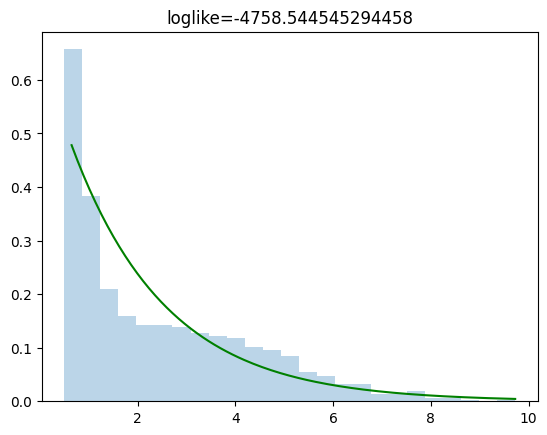

(2546,)
for tr12:
(0.5006391969259144, 2.614742864850401)


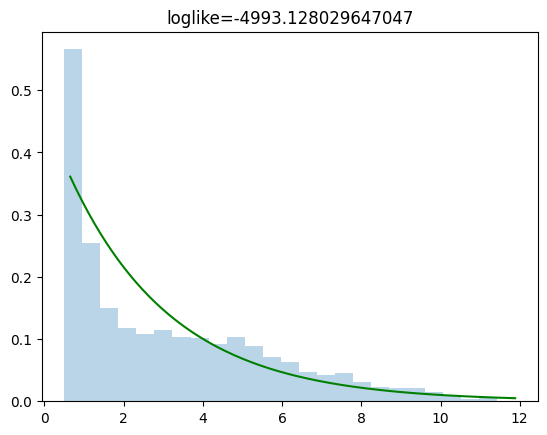

(1971,)
for tr2:
(0.5005168122589724, 2.0806887587730967)


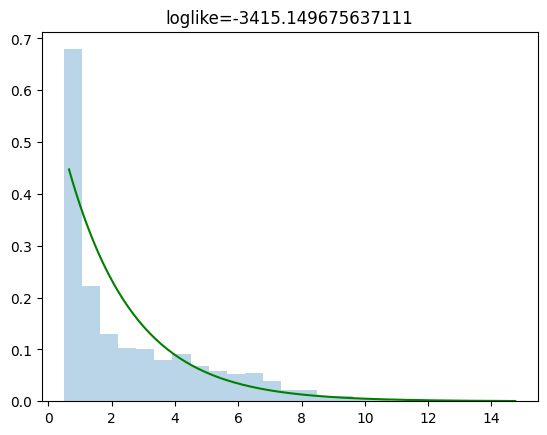

(1243,)
for tr3:
(0.5017707065725598, 3.408023950342602)


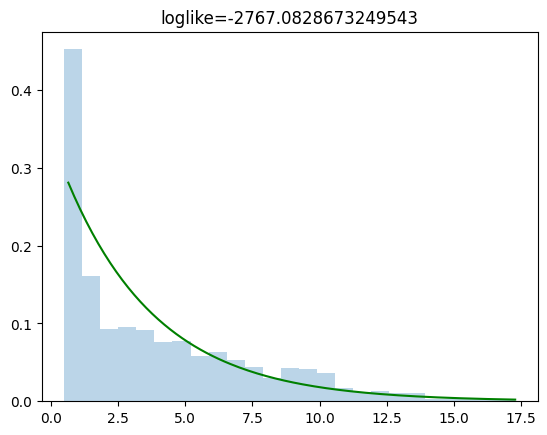

(582,)
for tr4:
(0.5032787277109718, 2.700392794863102)


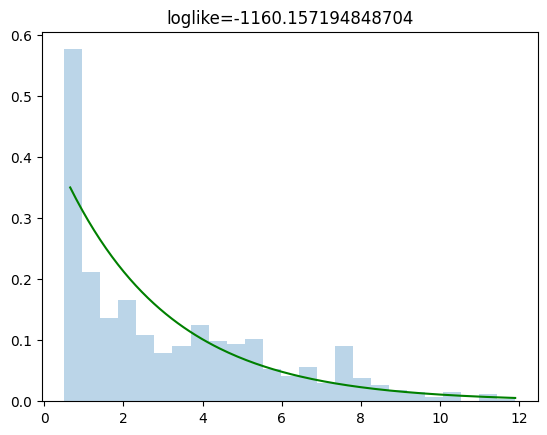

(2013,)
for tr5:
(0.5006259067357064, 4.820846411668126)


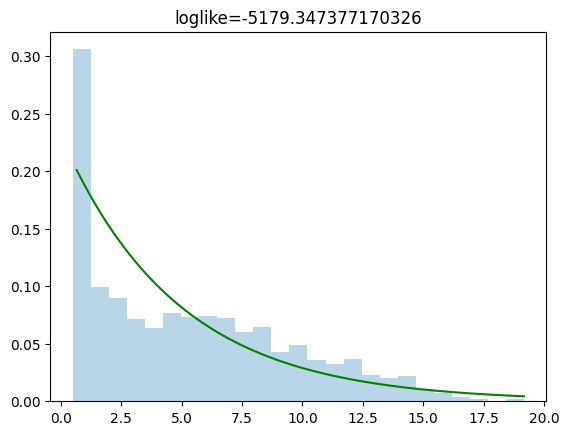

(3143,)
for tr6:
(0.5012646986035069, 3.4262787990212695)


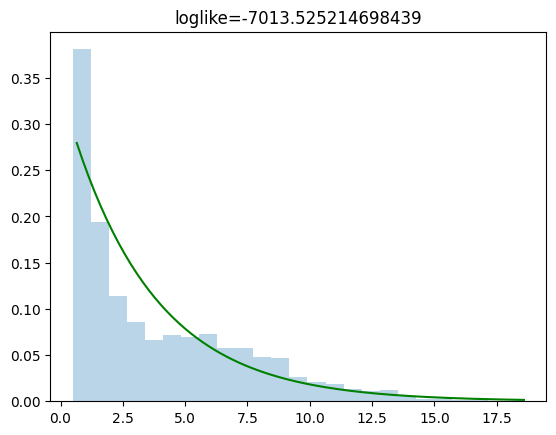

(3266,)
for tr7:
(0.5005855720638664, 3.1624800247383273)


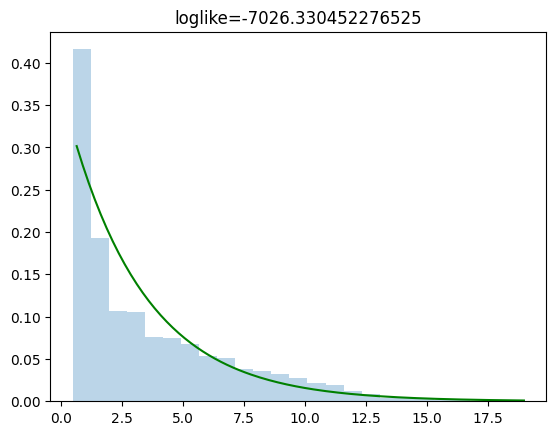

(2966,)
for tr91:
(0.5021428983875862, 4.128883089457551)


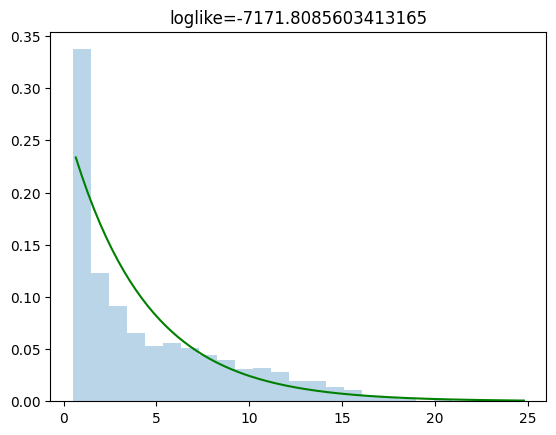

In [27]:
### Use stats. Fit exponent law 
from scipy.stats import expon

for k, df in df_dict.items():

    xy = df['step_length']
    xy = xy[xy >= SITTING_THRESHOLD]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    print(xy.shape)

    print(f'for {k}:')

    exp_est = 1.0
    x0_est = 0.
    scale_est = 1.
    sol1 = expon.fit(xy, loc=x0_est, scale=scale_est)

    print(sol1)
    # params = sol1

    # Plot CDF of the noisy data and the fit
    x_arr = np.linspace(np.min(xy)+0.15, np.max(xy), 150)

    yfit = expon.pdf(x_arr, *sol1)
    plt.plot(x_arr, yfit, color='g', label='Fit')
    plt.hist(xy, bins=25, alpha=0.3, density=True)
    
    res = np.sum(np.log(expon.pdf(xy, *sol1)))
    plt.title(f"loglike={res}")
    plt.show()
    # break

for tr11:
For exp law 0.9428601643010533
For power law 0.9806817380849577


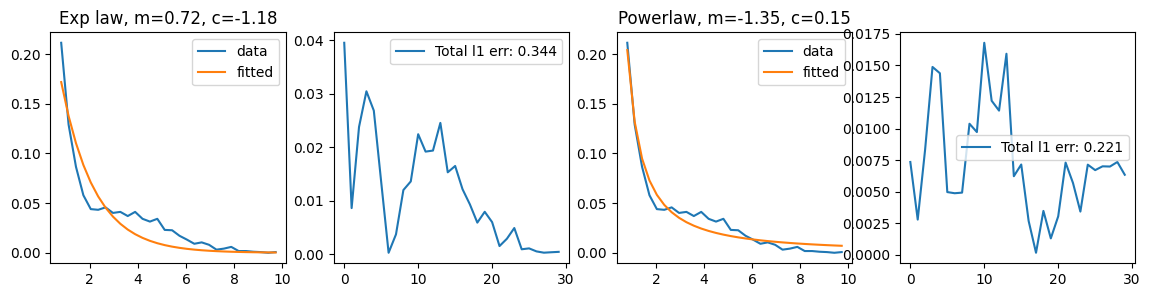

for tr12:
For exp law 0.9226026143164268
For power law 0.9717376128229367


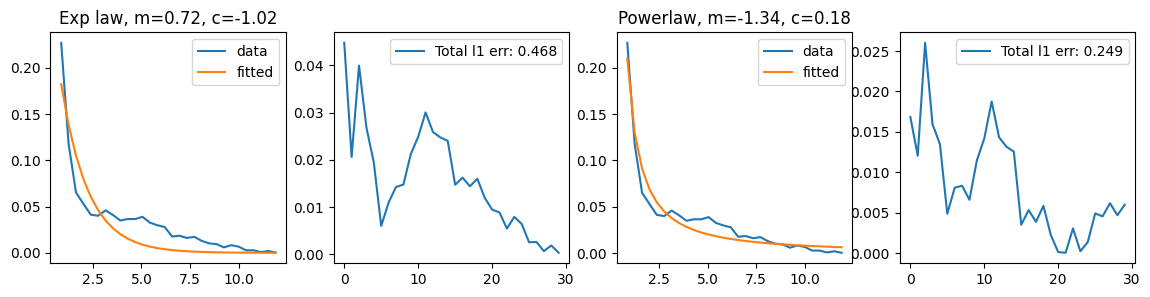

for tr2:
For exp law 0.970036079015973
For power law 0.9856186048442384


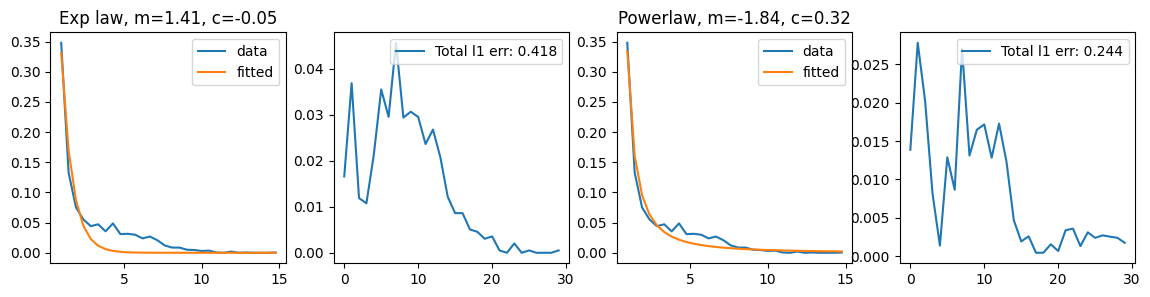

for tr3:
For exp law 0.9417009934423363
For power law 0.976798709869196


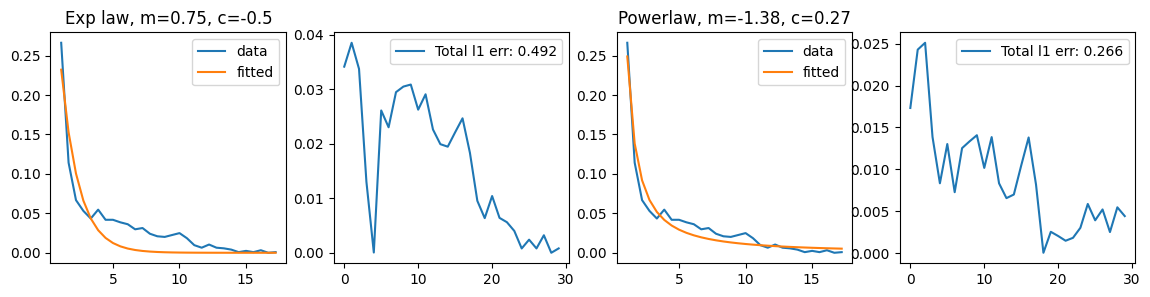

for tr4:
For exp law 0.906077582128726
For power law 0.9597379064039674


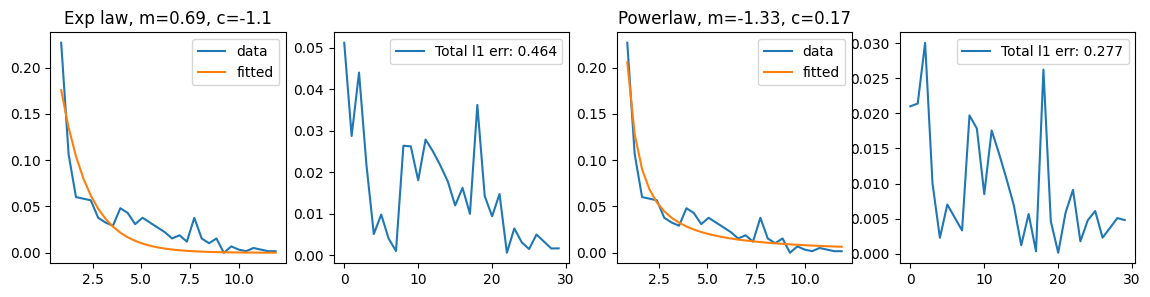

for tr5:
For exp law 0.8394353151676862
For power law 0.93257550892206


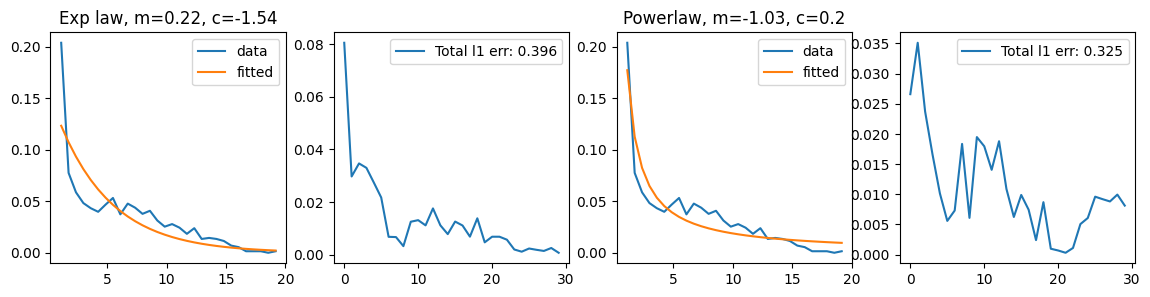

for tr6:
For exp law 0.9499864277799814
For power law 0.9851642908787295


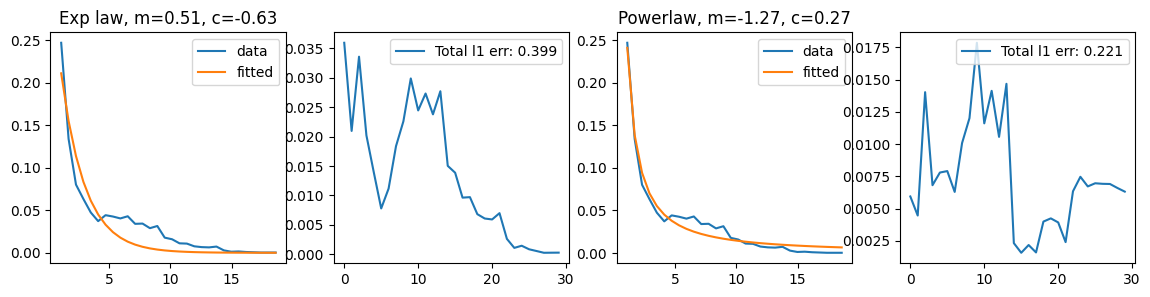

for tr7:
For exp law 0.9646130530139327
For power law 0.9922508077591512


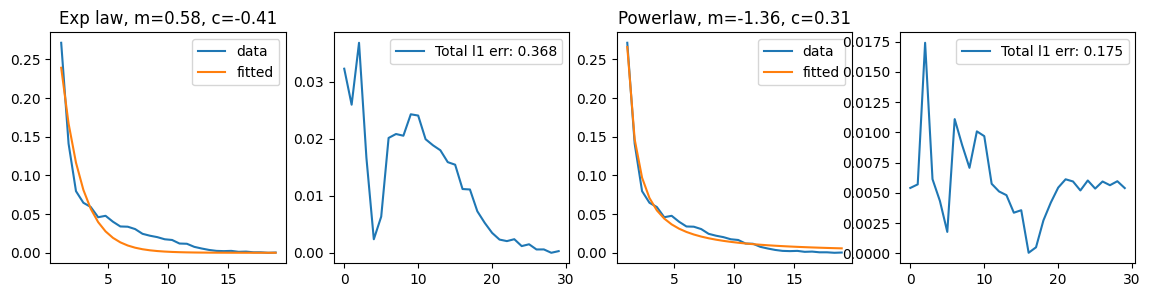

for tr91:
For exp law 0.953536143622267
For power law 0.9845031653459666


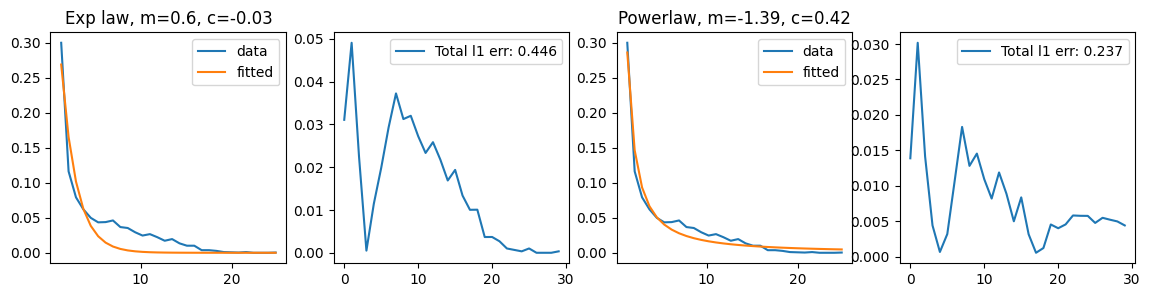

In [30]:
for k, df in df_steps_hist.items():
    x = df[1][1:]  # vals
    y = df[0] / np.sum(df[0])  # freqs
    # y = df[0]  # freqs
    print(f'for {k}:')

    sol1 = curve_fit(power_law, x, y, p0 = np.asarray([1., 10**5]))
    # sol1 = scipy.stats.powerlaw.fit(data_noise, exp_est, loc=x0_est, scale=scale_est)

    # sol2 = curve_fit(powerlaw_with_bias, x, y, 
    #                 p0 = np.asarray([1., 10**3, 0.]), maxfev = 2000)
    sol2 = curve_fit(exp_law, x, y, 
                    p0 = np.asarray([1., 0.,]), maxfev = 2000)
    
    params = sol2[0]
    qq = exp_law(x, params[0], params[1])
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].plot(x, y, label='data')
    ax[0].plot(x, qq, label='fitted')
    ax[0].set_title(f'Exp law, m={round(params[0], 2)}, c={round(params[1], 2)}')
    ax[0].legend()
    # residuals
    res = np.abs(y - qq)
    print('For exp law', np.corrcoef(y, qq)[0, 1])
    ax[1].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[1].legend()

    params = sol1[0]
    qq = power_law(x, params[0], params[1])
    ax[2].plot(x, y, label='data')
    ax[2].plot(x, qq, label='fitted')
    ax[2].set_title(f'Powerlaw, m={round(params[0], 2)}, c={round(params[1], 2)}')
    ax[2].legend()
    # residuals
    res = np.abs(y - qq)
    print('For power law', np.corrcoef(y, qq)[0, 1])
    ax[3].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[3].legend()

    plt.show()

    # TODO: it is better to fit in log coords 
    # since least squares badly fit small values wrt big values
    # min of squares of error is reased with fitting big values 
    
    # 1. x, y => ln(x), ln(y)
    # 2. params = curve_fit(ln(x), ln(y))
    #    y = a*x**b => ln(y) = ln(a) + b * ln(x)
    # 3. => y = exp(ln(a) + b * ln(x))
    # PROFIT

In [10]:
# Make conclusion that power law without bias is better according to residuals

### Fit in log-log coordinates 

Dropped: 2952 points


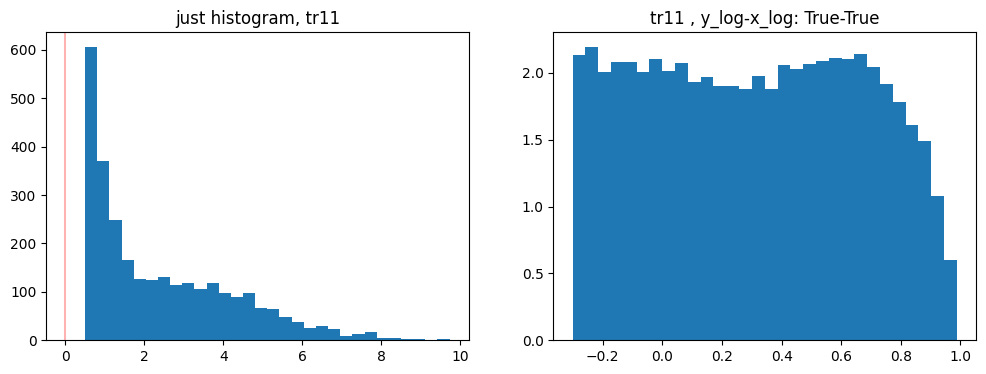

Dropped: 3268 points


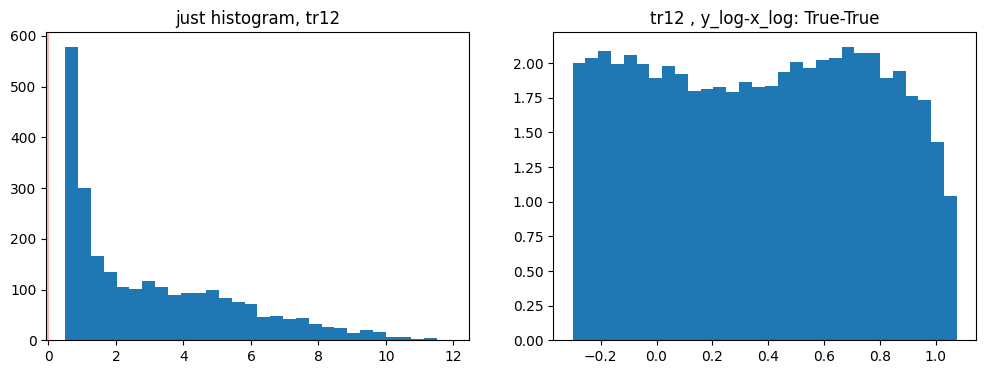

Dropped: 3817 points


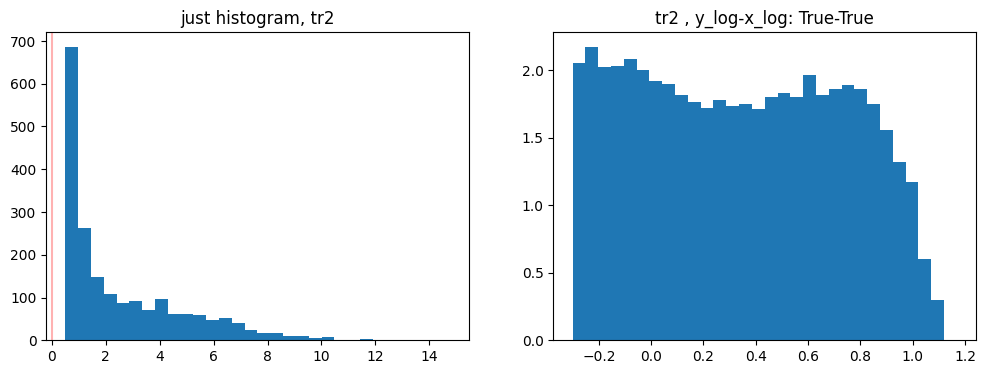

Dropped: 971 points


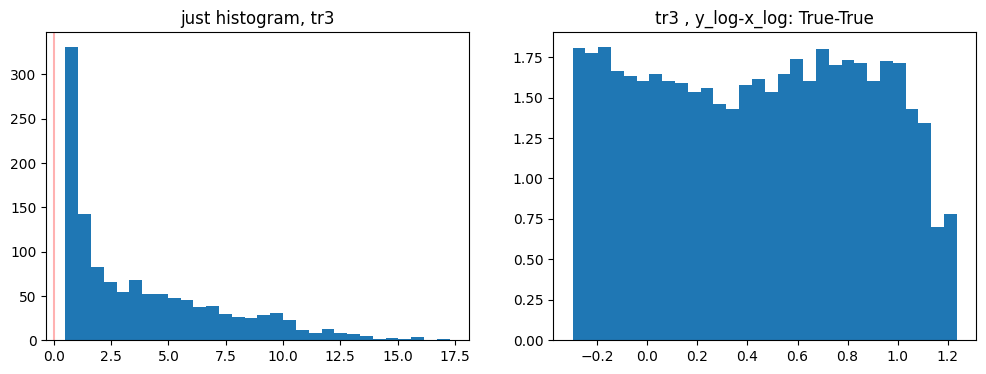

Dropped: 277 points


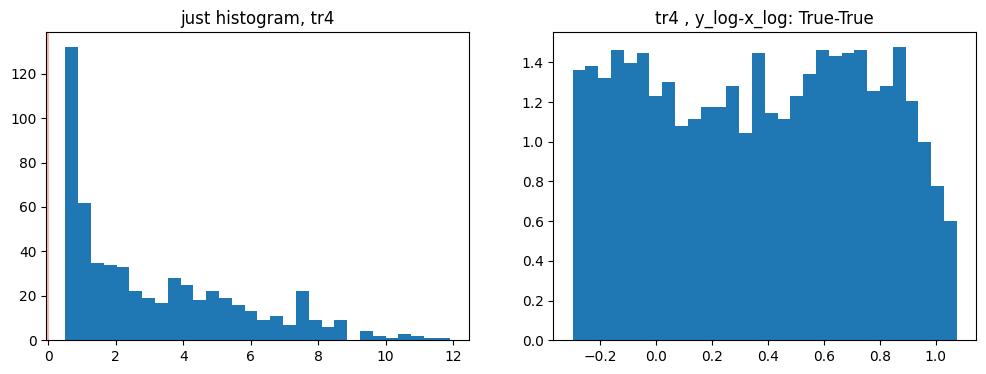

Dropped: 908 points


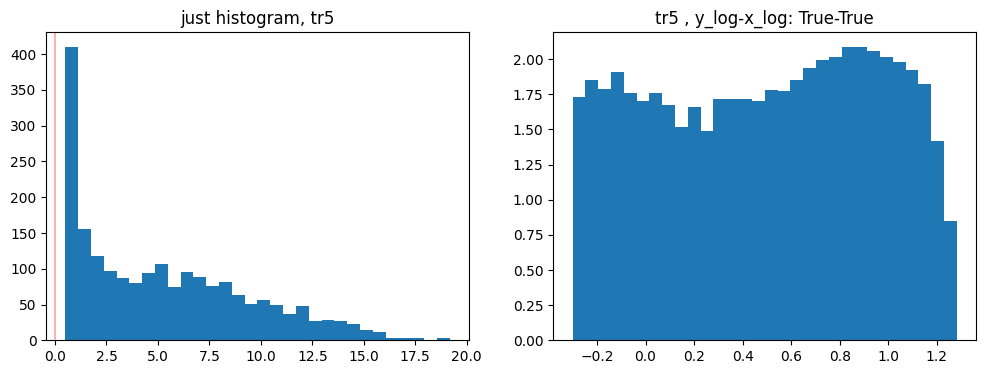

Dropped: 2077 points


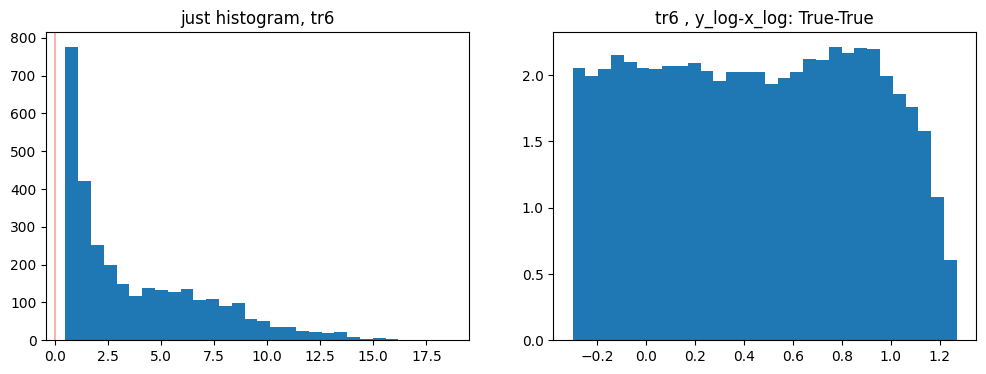

Dropped: 1744 points


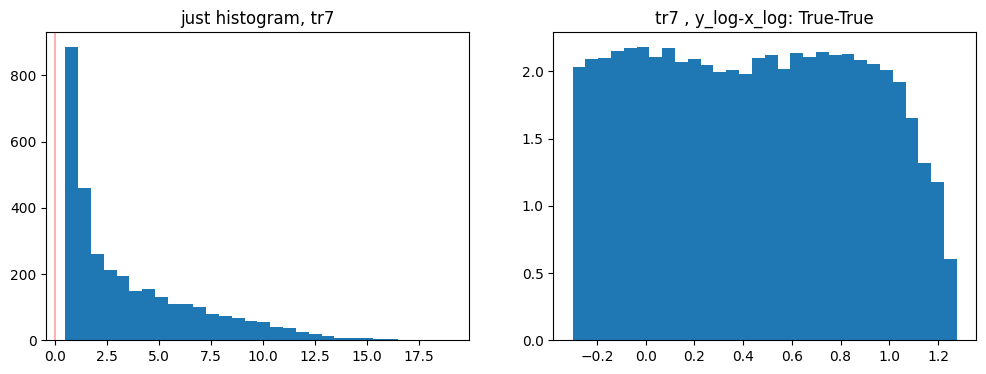

Dropped: 2693 points


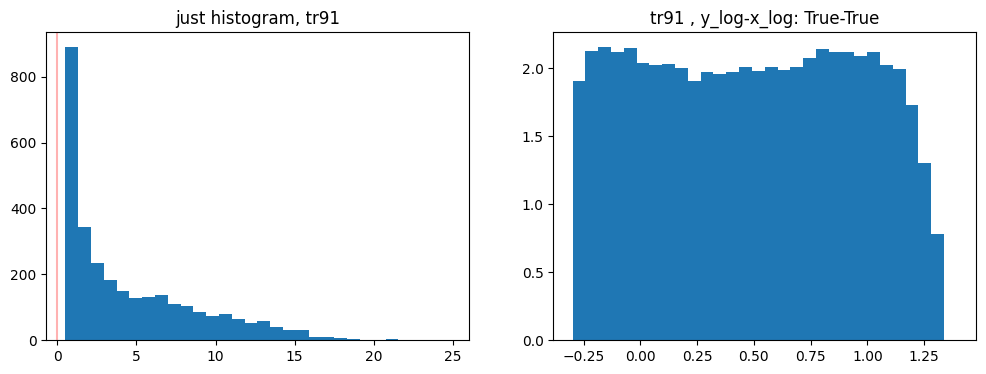

In [31]:
df_steps_hist_log_log = {}
for k, df in df_dict.items():

    h, xybins = plot_step_lens_hist(df, 30, k , y_log=True, x_log=True)
    df_steps_hist_log_log[k] = [h, xybins]

In [32]:
def linear(x, a, b):
    return a * x + b

def parabola(x, a, b, c):
    return a * (x - b)**2 + c

for tr11:
LinregressResult(slope=-0.5158826257619196, intercept=2.096811416534719, rvalue=-0.5857218395302601, pvalue=0.0006723612274248056, stderr=0.13490871066513851, intercept_stderr=0.07028943731979473)


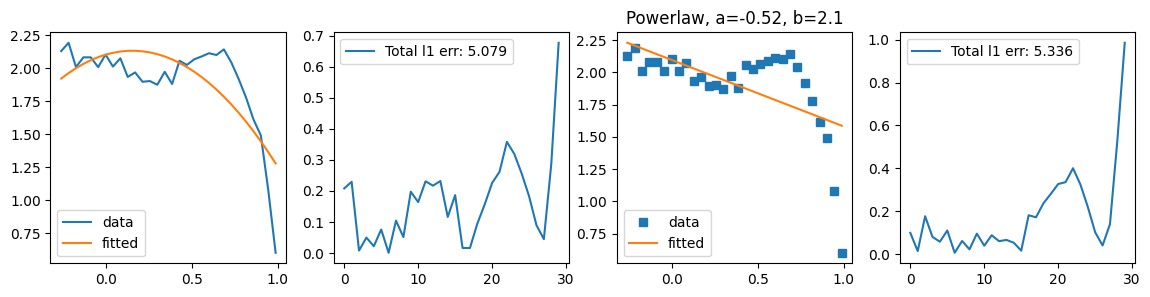

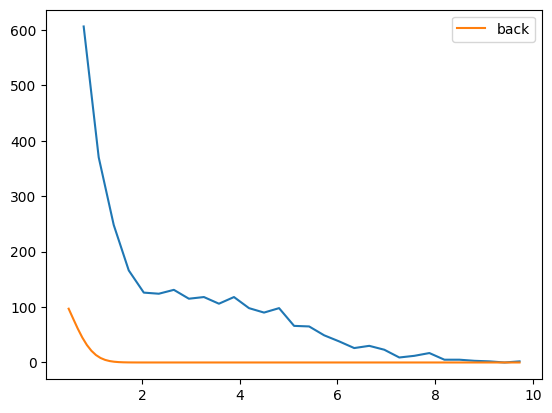

for tr12:
LinregressResult(slope=-0.23637301724236354, intercept=1.9892079090209982, rvalue=-0.44664694161485263, pvalue=0.013350116625907285, stderr=0.08948226171855275, intercept_stderr=0.05107054325149821)


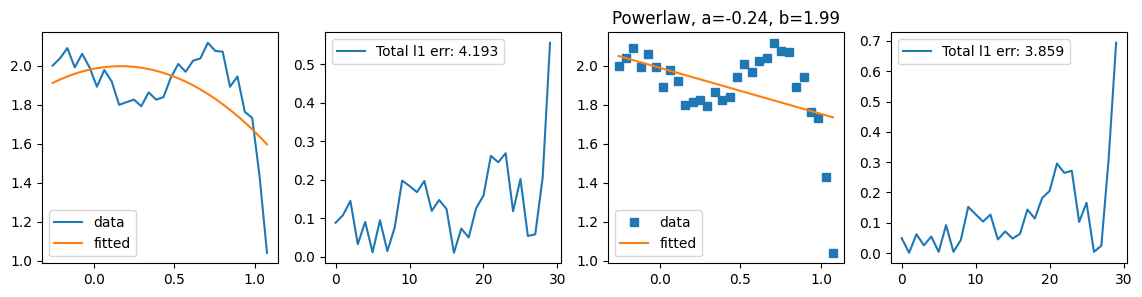

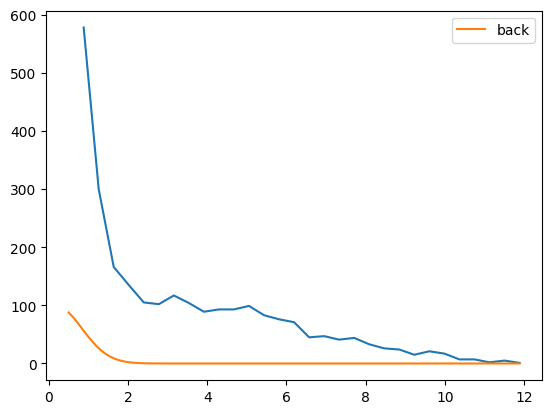

for tr2:
LinregressResult(slope=-0.8561980412807184, intercept=2.0598660427760054, rvalue=-0.7214738777904299, pvalue=6.831224434093826e-06, stderr=0.1552951125446762, intercept_stderr=0.09699694747479766)


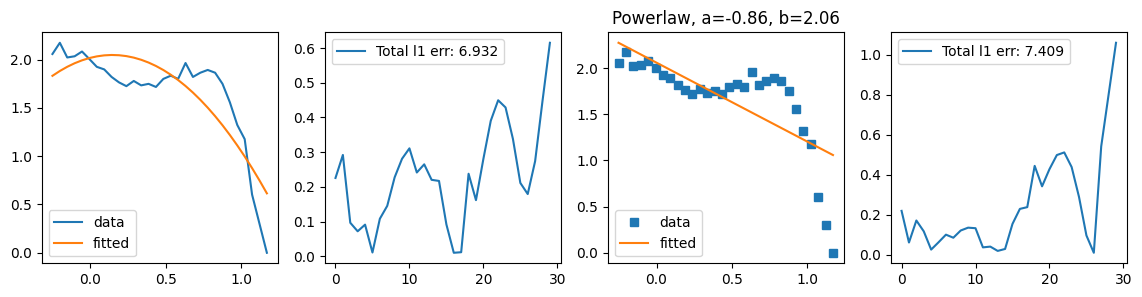

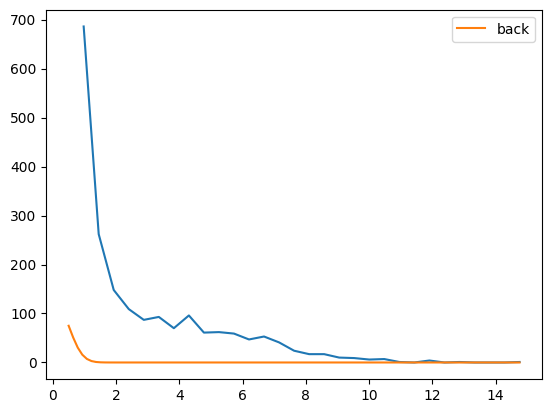

for tr3:
LinregressResult(slope=-0.27130602296931666, intercept=1.7029602068643133, rvalue=-0.4818786071237665, pvalue=0.007009356730211116, stderr=0.0932319675483001, intercept_stderr=0.06192722041479457)


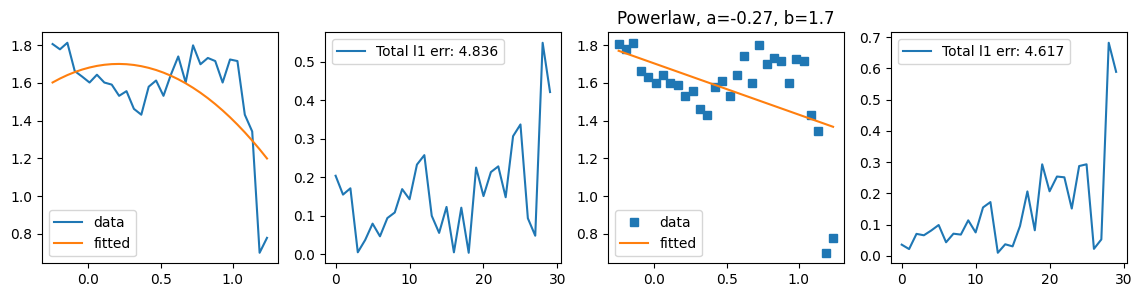

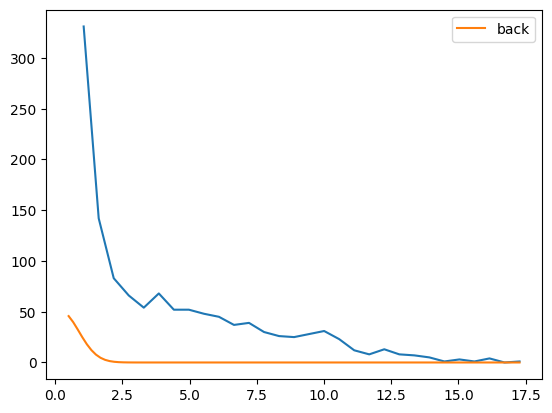

for tr4:
LinregressResult(slope=-0.19086318710477967, intercept=1.326800253622151, rvalue=-0.37133294088091634, pvalue=0.043348165650947755, stderr=0.09019064345076615, intercept_stderr=0.05153180237619639)


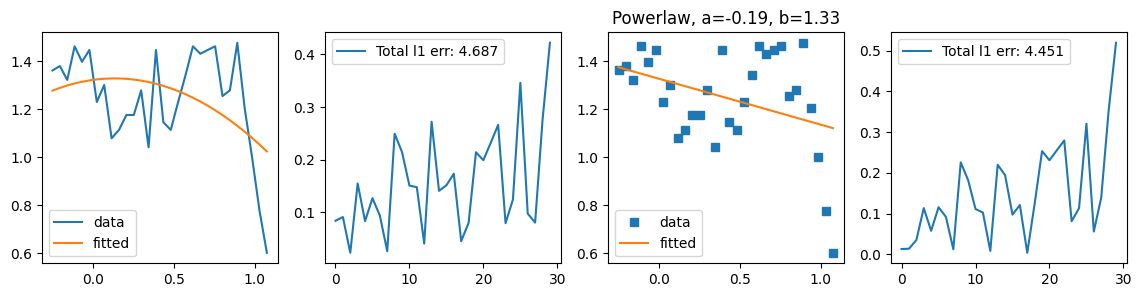

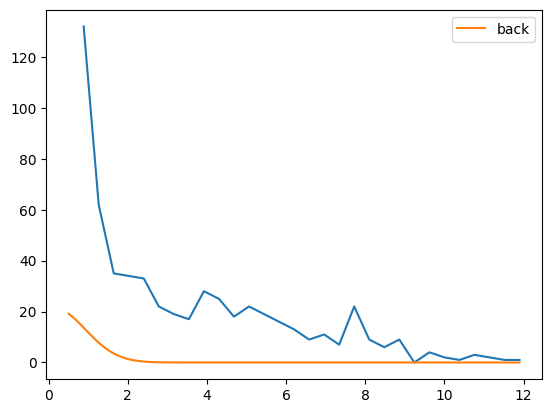

for tr5:
LinregressResult(slope=0.017247712874687585, intercept=1.76637457788445, rvalue=0.032654144368430414, pvalue=0.8639880887174392, stderr=0.09976599160242171, intercept_stderr=0.0688579910916082)


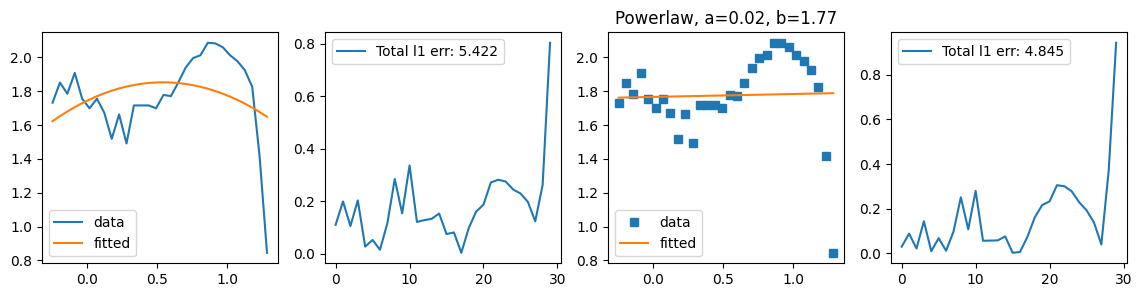

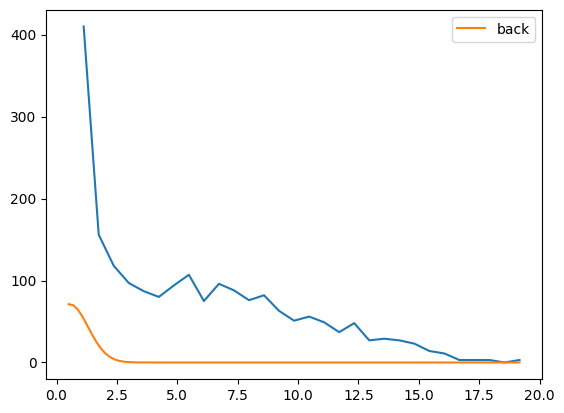

for tr6:
LinregressResult(slope=-0.36206411696877655, intercept=2.136457646057155, rvalue=-0.49891500470073036, pvalue=0.005008814593673211, stderr=0.11885682011062706, intercept_stderr=0.08113686039412407)


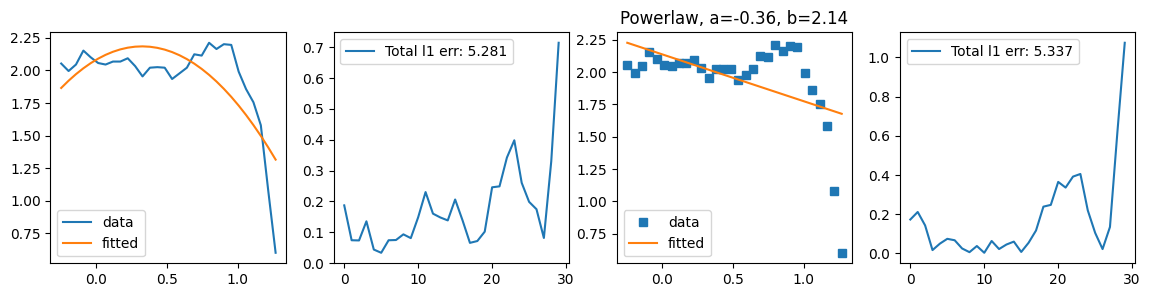

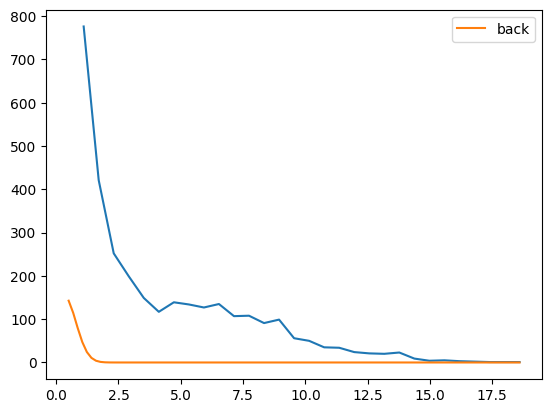

for tr7:
LinregressResult(slope=-0.4413449931574347, intercept=2.1910394670620024, rvalue=-0.591978679407175, pvalue=0.0005689882404018687, stderr=0.11355419295082347, intercept_stderr=0.078057306594454)


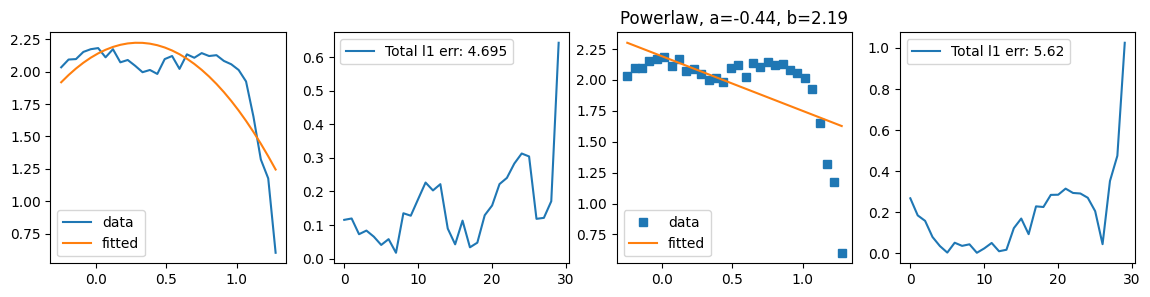

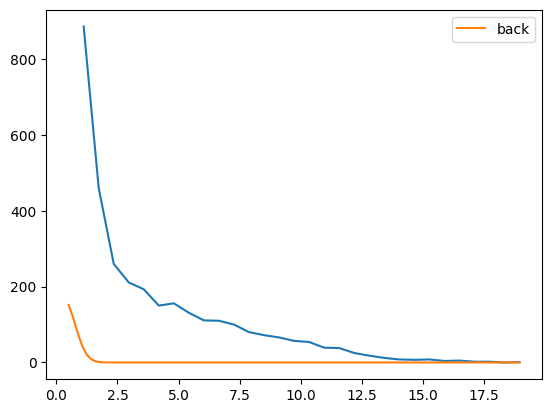

for tr91:
LinregressResult(slope=-0.4598516732060997, intercept=2.1591669557105018, rvalue=-0.5069699723744893, pvalue=0.004247552452862729, stderr=0.14775612841017502, intercept_stderr=0.11158791066330218)


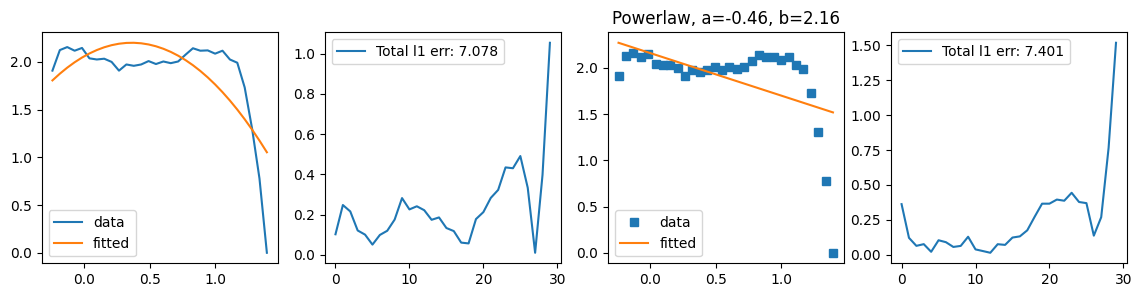

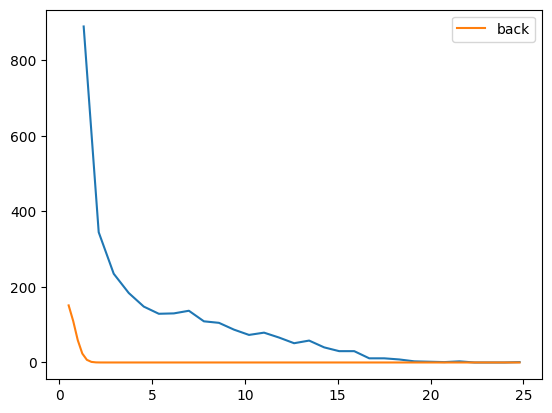

In [34]:
from scipy import stats

for k, df in df_steps_hist_log_log.items():
    x = df[1][1:]  # vals
    y = df[0]  # freqs
    print(f'for {k}:')

    # For polynom
    sol2 = curve_fit(parabola, x, y, p0=np.asarray([-0.5, 0., 0.]), maxfev=2000)  # maxfev=2000
    # print(sol2)
    params_poly = sol2[0]
    qq = parabola(x, *params_poly)

    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].plot(x, y, label='data')
    ax[0].plot(x, qq, label='fitted')
    ax[0].legend()
    # Residuals
    res = np.abs(y - qq)
    ax[1].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[1].legend()

    # For linear regression 
    sol1 = curve_fit(linear, x, y, p0=np.asarray([1., 2.]))
    print(stats.linregress(x, y))
    params = sol1[0]
    qq = linear(x, params[0], params[1])

    ax[2].plot(x, y, label='data', marker='s', lw=0)
    ax[2].plot(x, qq, label='fitted')
    ax[2].set_title(f'Powerlaw, a={round(params[0], 2)}, b={round(params[1], 2)}')
    ax[2].legend()
    # ax[2].ylim([])
    # Residuals
    res = np.abs(y - qq)
    ax[3].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[3].legend()

    plt.show()

    ### Transfer back from log-log
    h_linear, bins_linear = df_steps_hist[k]
    x_linear_grid = np.linspace(bins_linear.min(), bins_linear.max(), 100)
    
    plt.plot(bins_linear[1:], h_linear)
    # plt.show()

    ## Linear
    # a, b = params[0], params[1]
    # h_linear_grid = 10**(b + a * x_linear_grid)

    ## Parabola
    h_linear_grid = 10**parabola(x_linear_grid, *params_poly)

    plt.plot(x_linear_grid, h_linear_grid, label='back')
    plt.legend()
    plt.show()


    # 1. x, y => ln(x), ln(y)
    # 2. params = curve_fit(ln(x), ln(y))
    #    y = a*x**b => ln(y) = ln(a) + b * ln(x)
    # 3. => y = exp(ln(a) + b * ln(x))
    # PROFIT

### Check Goodness-of-fit

In [ ]:
# TODO add estimation of fitting A
# NOTE: for now use likelihood!

# TODO: it is better to fit in log coords 
# since least squares badly fit small values wrt big values
# min of squares of error is reased with fitting big values 

# 1. x, y => ln(x), ln(y)
# 2. params = curve_fit(ln(x), ln(y))
#    y = a*x**b => ln(y) = ln(a) + b * ln(x)
# 3. => y = exp(ln(a) + b * ln(x))
# PROFIT

## Check distribution of step lens for all mouses together 

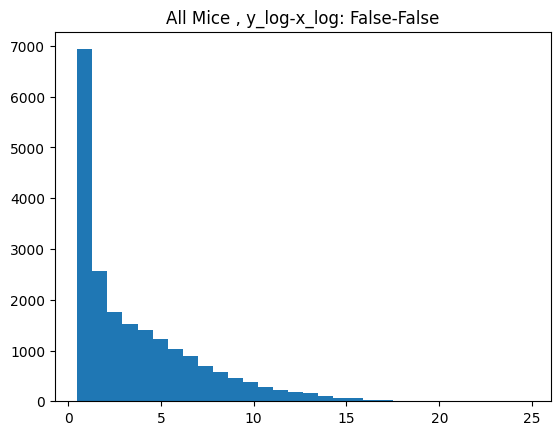

In [43]:
all_mice_step_lens = []

for k, df in df_dict.items():
    xy = df['step_length']
    xy = xy[xy >= SITTING_THRESHOLD]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    
    all_mice_step_lens.append(xy)

y_log, x_log = False, False
all_mice_df = pd.concat(all_mice_step_lens, ignore_index=True)
h_all_mice, xybins_all_mice = np.histogram(all_mice_df, bins=30)
plt.bar(xybins_all_mice[:-1], h_all_mice,
        align='edge', width=np.diff(xybins_all_mice))
plt.title(f'All Mice , y_log-x_log: {y_log}-{x_log}')
plt.show()

(0.3497709543809361, 0.5000025427285094, 24.297744994590744)


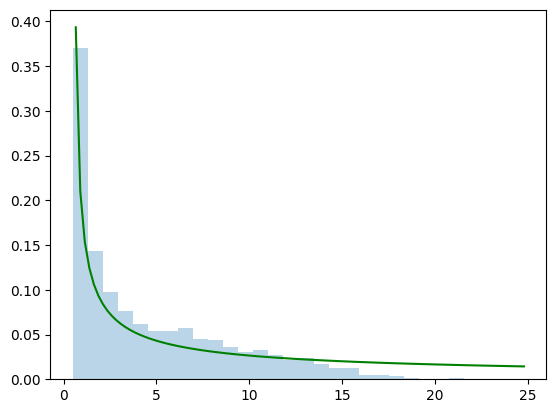

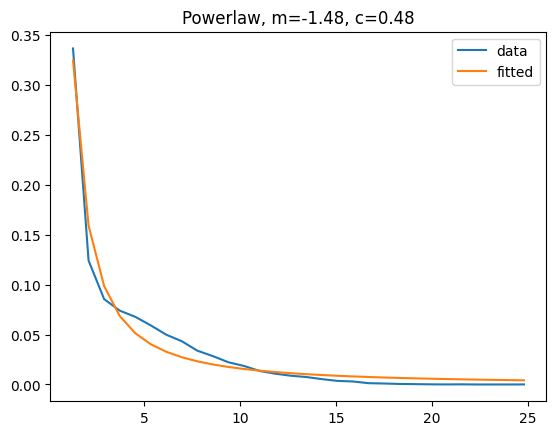

In [47]:
# Fit power law
# with stats
exp_est = 1.0
x0_est = 0.
scale_est = 1.
sol1 = powerlaw.fit(all_mice_df, exp_est, loc=x0_est, scale=scale_est)
print(sol1)
# Plot CDF of the noisy data and the fit
x_arr = np.linspace(np.min(all_mice_df)+0.15, np.max(all_mice_df), 100)

yfit = powerlaw.pdf(x_arr, *sol1)
plt.plot(x_arr, yfit, color='g', label='Fit')
plt.hist(xy, bins=30, alpha=0.3, density=True)
plt.show()

# with curve_fit: h, xybins
x = xybins_all_mice[1:]  # vals
y = h_all_mice / np.sum(h_all_mice)  # freqs
sol1 = curve_fit(power_law, x, y, p0 = np.asarray([1., 10**5]))

params = sol1[0]
qq = power_law(x, params[0], params[1])
plt.plot(x, y, label='data')
plt.plot(x, qq, label='fitted')
plt.title(f'Powerlaw, m={round(params[0], 2)}, c={round(params[1], 2)}')
plt.legend()
plt.show()

# Divide step lens wrt areas

For building a model of running mouse we divided square area in 3 sub-areas: center, walls, and corners. Now we have to explore if the statistics vary wrt to the sub-area.

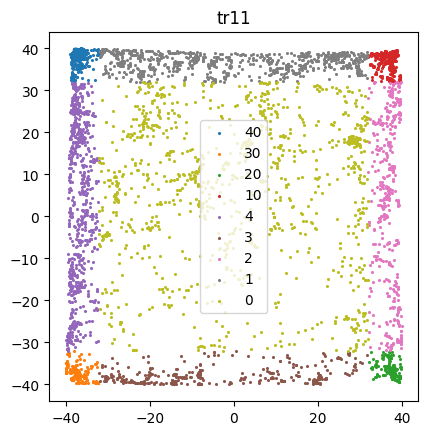

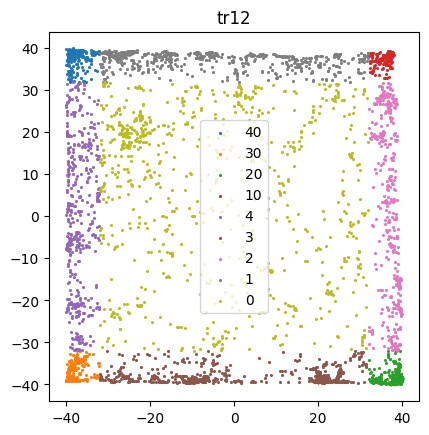

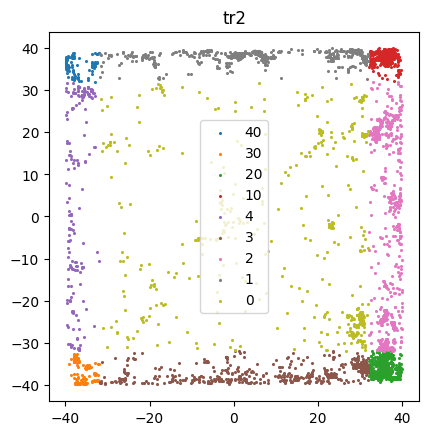

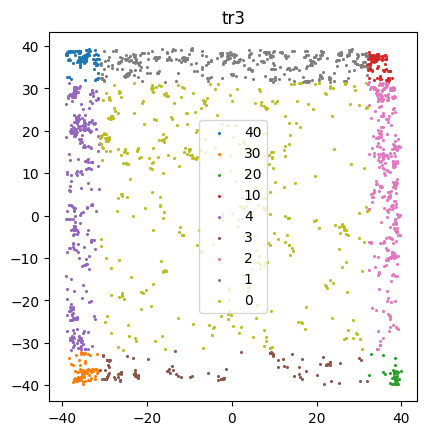

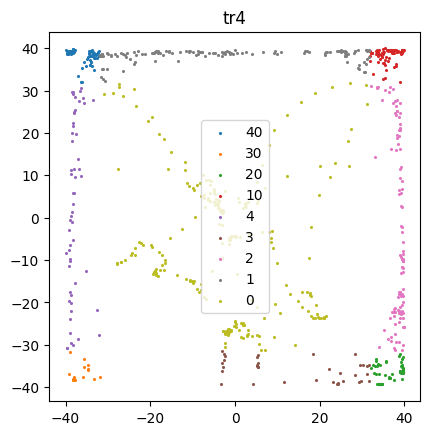

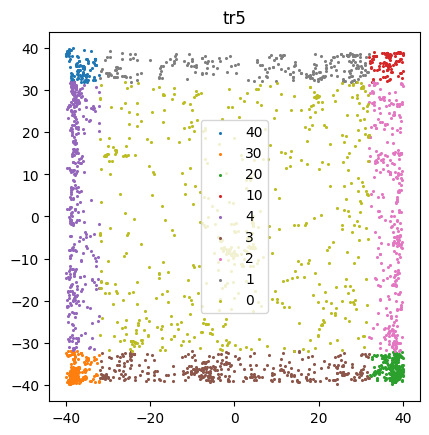

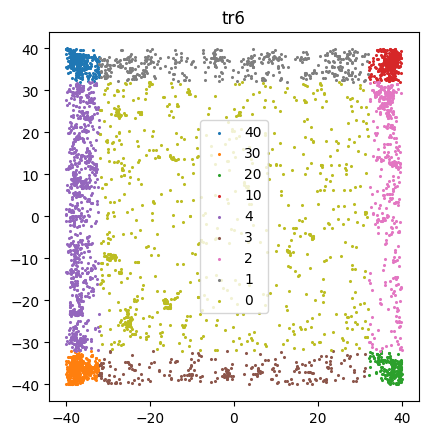

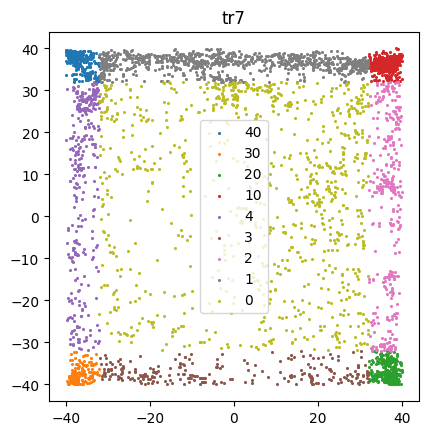

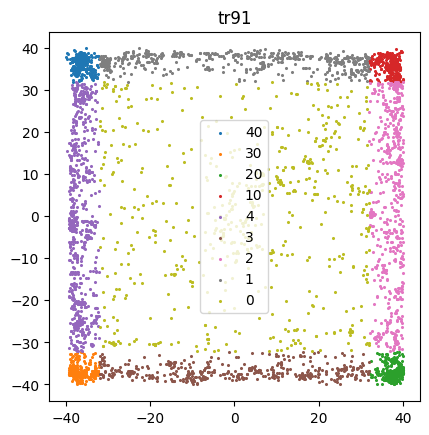

In [48]:
from utils.processing import sort_walls_area
from utils.plotting import plot_wall_sorted_samples

df_dict_areas = {}
for k, df in df_dict.items():
    df_areas = sort_walls_area(df, wall_percent=0.1)
    df_dict_areas[k] = df_areas
    plot_wall_sorted_samples(df_areas, k)

### For each mouse, for each area

for  tr11
Dropped: 307 points
Dropped: 370 points
Dropped: 151 points
Dropped: 185 points
Dropped: 384 points
Dropped: 195 points
Dropped: 113 points
Dropped: 114 points
Dropped: 1133 points


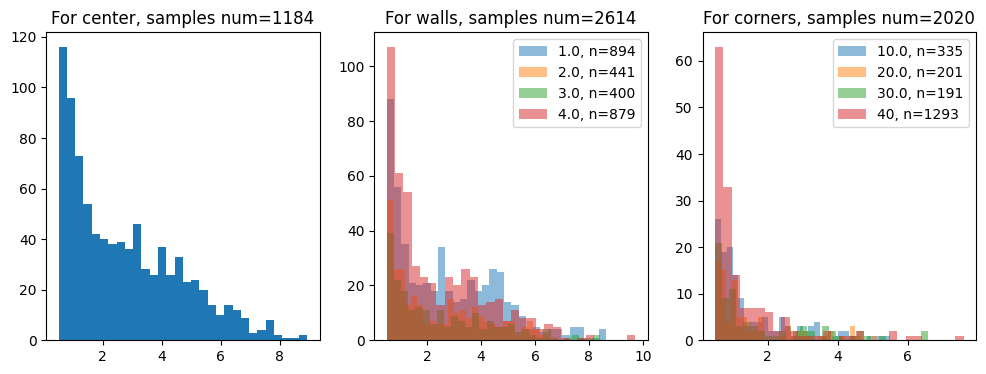

for  tr12
Dropped: 221 points
Dropped: 266 points
Dropped: 131 points
Dropped: 748 points
Dropped: 110 points
Dropped: 87 points
Dropped: 1293 points
Dropped: 135 points
Dropped: 277 points


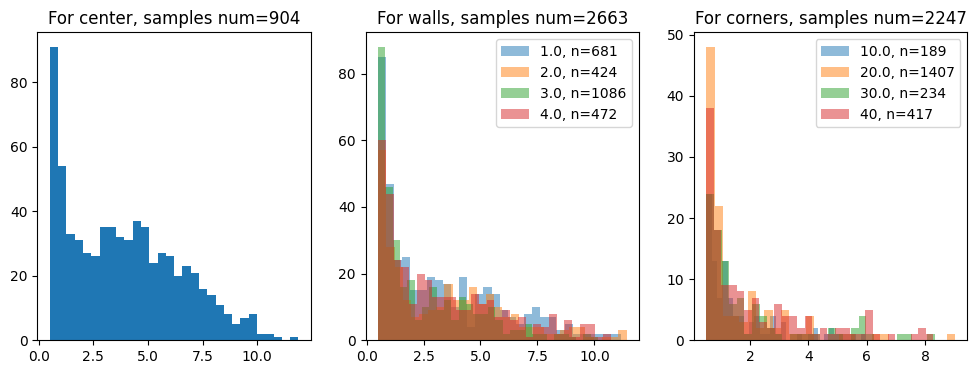

for  tr2
Dropped: 372 points
Dropped: 552 points
Dropped: 687 points
Dropped: 362 points
Dropped: 68 points
Dropped: 755 points
Dropped: 828 points
Dropped: 146 points
Dropped: 47 points


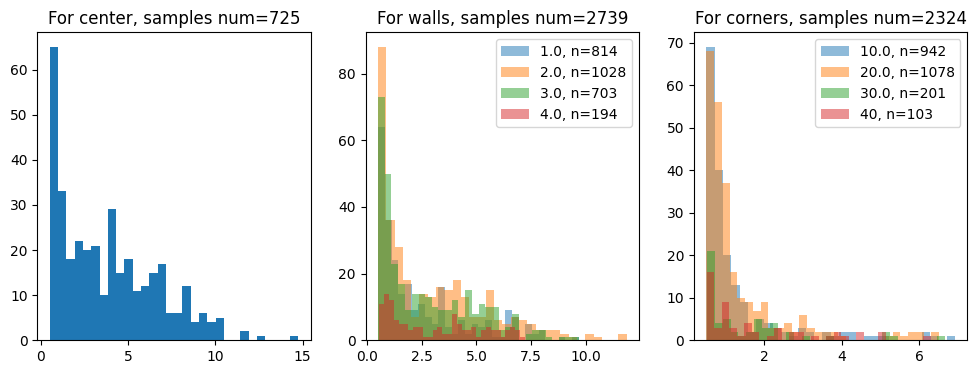

for  tr3
Dropped: 100 points
Dropped: 214 points
Dropped: 177 points
Dropped: 55 points
Dropped: 163 points
Dropped: 80 points
Dropped: 27 points
Dropped: 32 points
Dropped: 123 points


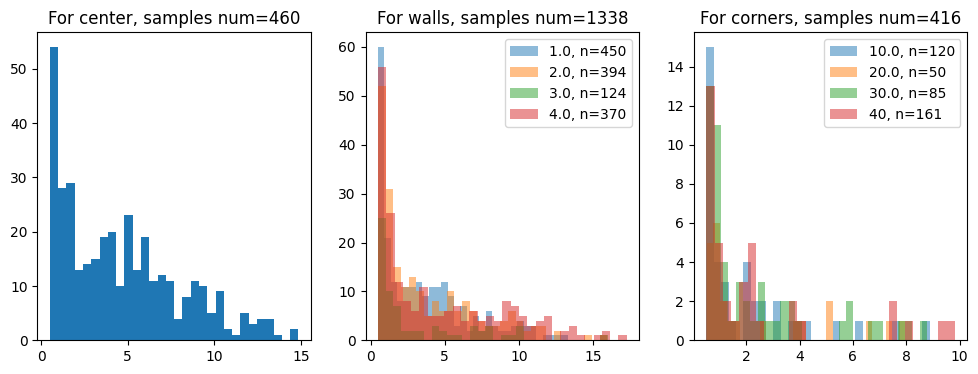

for  tr4
Dropped: 62 points
Dropped: 21 points
Dropped: 38 points
Dropped: 11 points
Dropped: 2 points
Dropped: 40 points
Dropped: 54 points
Dropped: 7 points
Dropped: 42 points


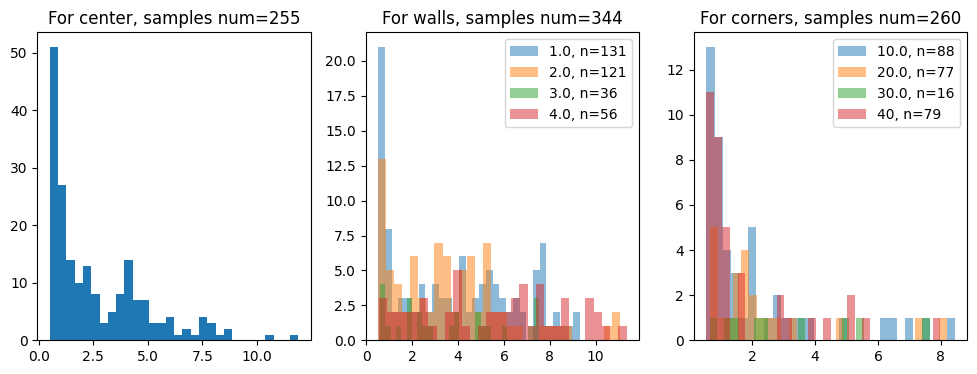

for  tr5
Dropped: 116 points
Dropped: 55 points
Dropped: 57 points
Dropped: 70 points
Dropped: 73 points
Dropped: 45 points
Dropped: 243 points
Dropped: 175 points
Dropped: 74 points


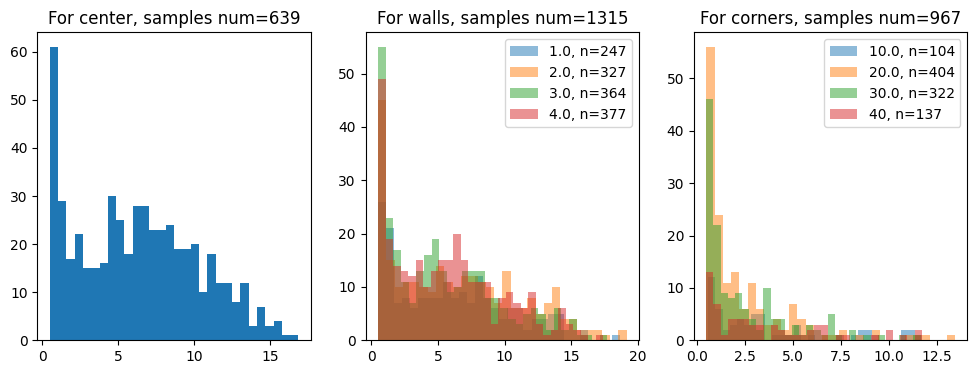

for  tr6
Dropped: 305 points
Dropped: 114 points
Dropped: 175 points
Dropped: 60 points
Dropped: 499 points
Dropped: 196 points
Dropped: 100 points
Dropped: 407 points
Dropped: 221 points


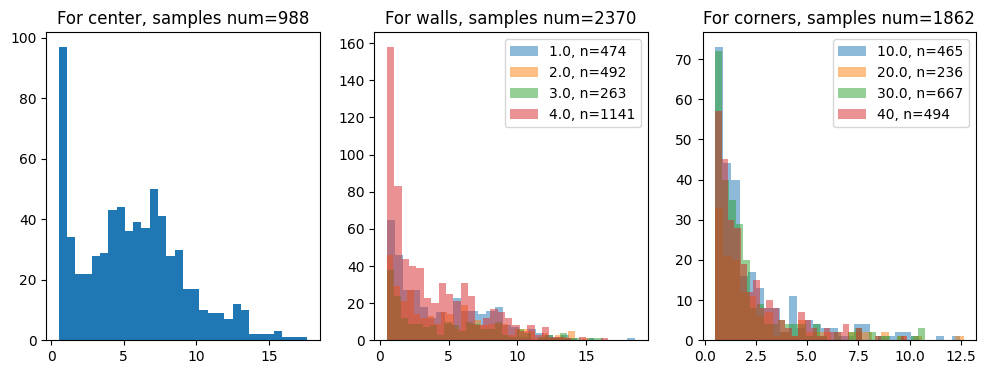

for  tr7
Dropped: 94 points
Dropped: 422 points
Dropped: 96 points
Dropped: 52 points
Dropped: 102 points
Dropped: 505 points
Dropped: 197 points
Dropped: 112 points
Dropped: 164 points


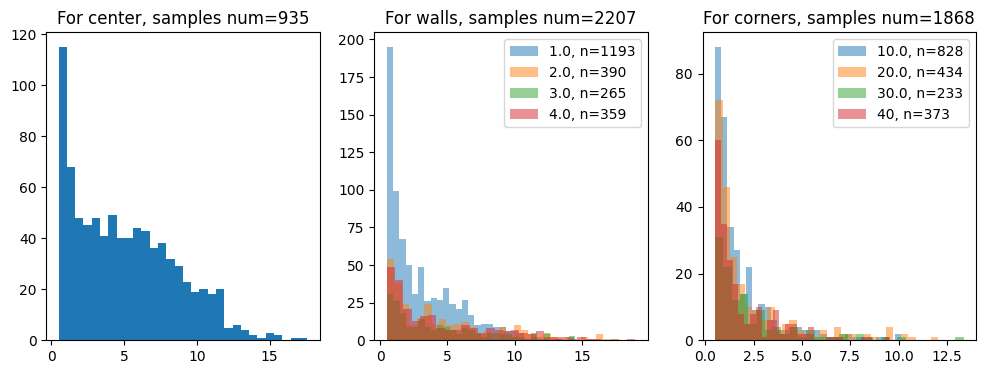

for  tr91
Dropped: 116 points
Dropped: 154 points
Dropped: 198 points
Dropped: 133 points
Dropped: 1262 points
Dropped: 220 points
Dropped: 252 points
Dropped: 161 points
Dropped: 197 points


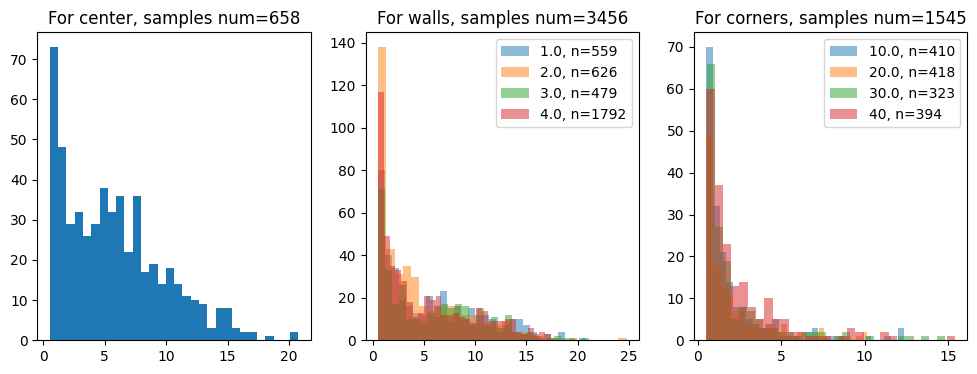

In [52]:
def calc_hist(xy, binn, log_log=False):
    xy = np.log10(xy) if log_log else xy
    hist, bin_edges = np.histogram(xy, bins=binn)
    hist = np.log10(hist) if log_log else hist
    return hist, bin_edges


BINS = 30
for k, df in df_dict_areas.items():
    print('for ', k)
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    w, c, z = 0, 0, 0
    for area in [0., 1., 2., 3., 4., 10., 20., 30., 40]:
        
        sorted_df = df.loc[df['near_wall']==area].copy()

        step_lens = sorted_df['step_length']
        before = step_lens.shape[0]
        step_lens = step_lens[step_lens >= SITTING_THRESHOLD]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
        print(f'Dropped: {before - step_lens.shape[0]} points')
    
        # for center 
        if area == 0.0:
            z += sorted_df.shape[0]
            hist, bin_edges = calc_hist(step_lens, binn=BINS, log_log=False)
            ax[0].bar(bin_edges[:-1], hist, align='edge', width=np.diff(bin_edges))

        # for walls
        elif area in [1., 2., 3., 4.]:
            w += sorted_df.shape[0]

            hist, bin_edges = calc_hist(step_lens, binn=BINS, log_log=False)
            ax[1].bar(bin_edges[:-1], hist, align='edge',
                      width=np.diff(bin_edges), alpha=0.5,
                      label=f'{str(area)}, n={sorted_df.shape[0]}')
            ax[1].legend()

        # for corners
        elif area in [10., 20., 30., 40.]:
            c += sorted_df.shape[0]

            hist, bin_edges = calc_hist(step_lens, binn=BINS, log_log=False)
            ax[2].bar(bin_edges[:-1], hist, align='edge',
                      width=np.diff(bin_edges), alpha=0.5,
                      label=f'{str(area)}, n={sorted_df.shape[0]}')
            ax[2].legend()

    ax[0].set_title(f'For center, samples num={z}') 
    ax[1].set_title(f'For walls, samples num={w}')
    ax[2].set_title(f'For corners, samples num={c}')

    plt.show()

**NOTE**:

Please, note the maximum possible step len in case of corners and center/walls. It is about 8 in corners and about 50+ in walls/center. Actually the maximum possible step len in corners depends only on the percent of the area we choose for the "corner". So it is a kind of hyperparameter.

The distributions in the center is less steep in comparison with walls distribution. Both have heavy tails. 

Some mouse has a "favorite" corner to sit in?

I also can note strange distribution of 4th mouse. So maybe I'll drop it too.

#### The same area division but all mice together

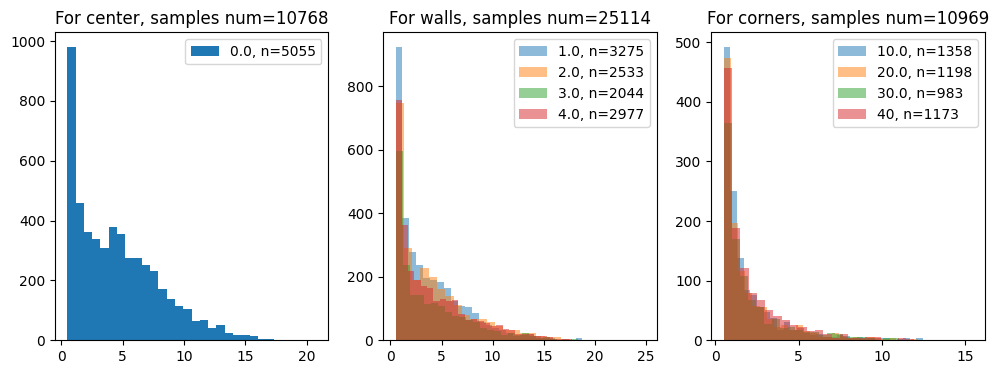

In [54]:
# Gather data for all mice for each area
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for area in [0., 1., 2., 3., 4., 10., 20., 30., 40]:

    in_area_step_lens = []
    for k, df in df_dict_areas.items():

        sorted_df = df.loc[df['near_wall']==area].copy()
        step_lens = sorted_df['step_length']
        step_lens = step_lens[step_lens >= SITTING_THRESHOLD] 
        in_area_step_lens.append(step_lens)

    in_area_step_lens = pd.concat(in_area_step_lens, ignore_index=True)
    hist, bin_edges = calc_hist(in_area_step_lens, binn=BINS, log_log=False)

    # for center
    if area == 0.:
        z += in_area_step_lens.shape[0]
        ax[0].bar(bin_edges[:-1], hist, align='edge',
                  width=np.diff(bin_edges),
                  label=f'{str(area)}, n={in_area_step_lens.shape[0]}')
        ax[0].legend()

    # for walls
    elif area in [1., 2., 3., 4.]:
        w += in_area_step_lens.shape[0]
        ax[1].bar(bin_edges[:-1], hist, align='edge',
                    width=np.diff(bin_edges), alpha=0.5,
                    label=f'{str(area)}, n={in_area_step_lens.shape[0]}')
        ax[1].legend()

    # for corners
    elif area in [10., 20., 30., 40.]:
        c += in_area_step_lens.shape[0]
        ax[2].bar(bin_edges[:-1], hist, align='edge',
                    width=np.diff(bin_edges), alpha=0.5,
                    label=f'{str(area)}, n={in_area_step_lens.shape[0]}')
        ax[2].legend()
        
ax[0].set_title(f'For center, samples num={z}') 
ax[1].set_title(f'For walls, samples num={w}')
ax[2].set_title(f'For corners, samples num={c}')

plt.show()


In [ ]:
# Gather data for all mice with united areas


In [ ]:
# Fit for all mice together curves



# Sit or Go Bernoulli distribution 

In [ ]:
# 1. take data. using sit threshold divide samples

# 2. for each mouse for each area find distr "sit or go" 

# 3. for each mouse unite one type area: corners, walls, center
#  and find distr "sit or go" 

# 4. for all mice for each area find distr "sit or go" 

# 5. for all mice unite one type area: corners, walls, center
#  and find distr "sit or go" 

In [ ]:
# calculate for each mouse favourite area 

## проведем анализ углы

tr11 (2020, 8)


/tmp/ipykernel_13213/2113354128.py:24: RuntimeWarning: divide by zero encountered in log10
  hist = np.log10(hist)


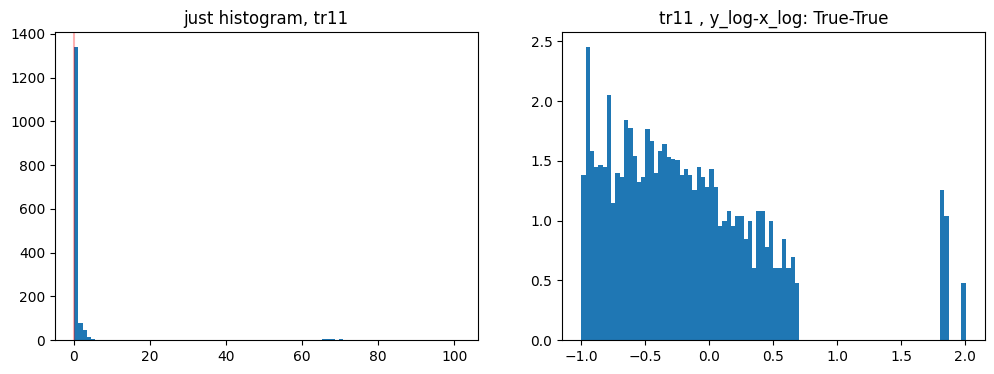

tr12 (2247, 8)


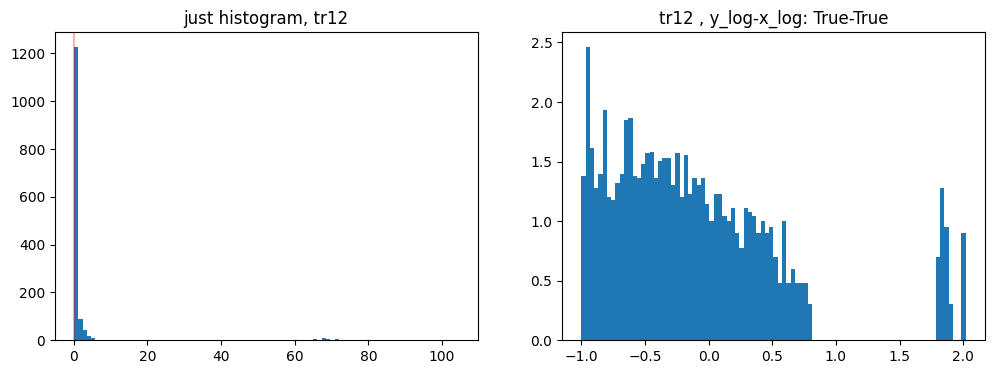

tr2 (2324, 8)


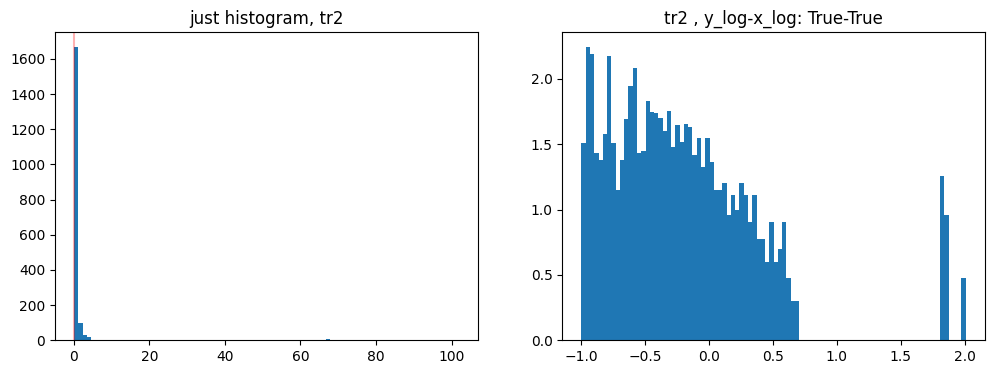

tr3 (416, 8)


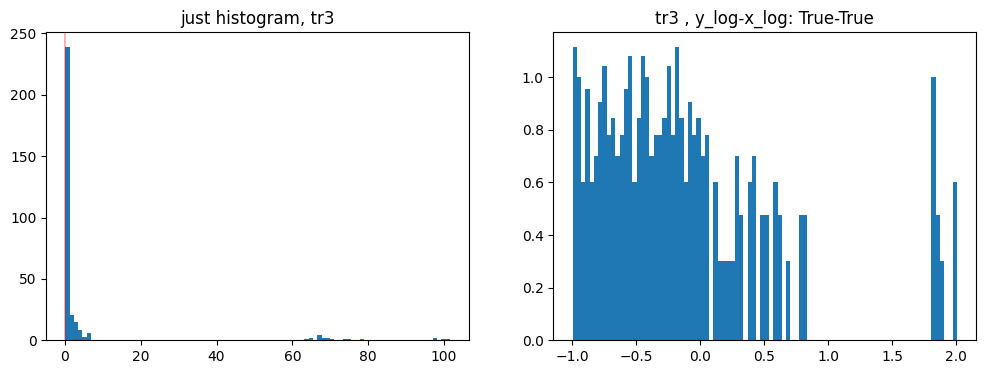

tr4 (260, 8)


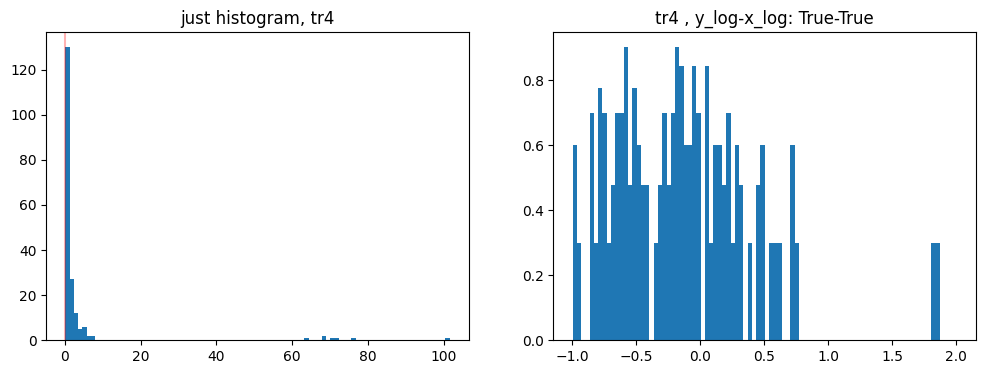

tr5 (967, 8)


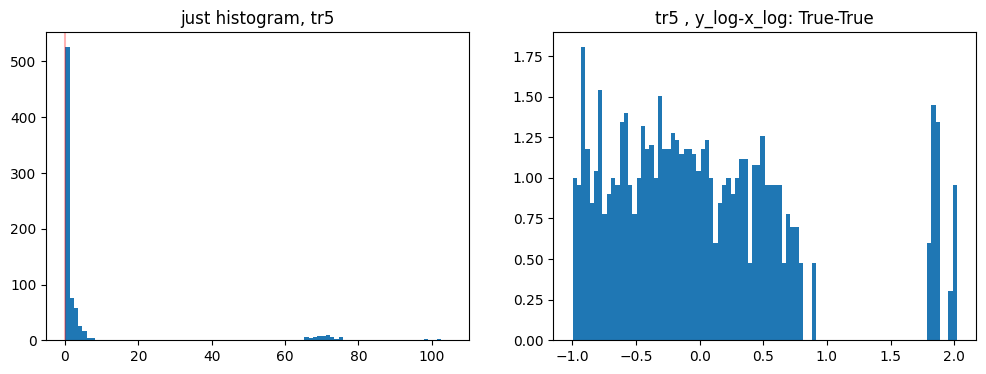

tr6 (1862, 8)


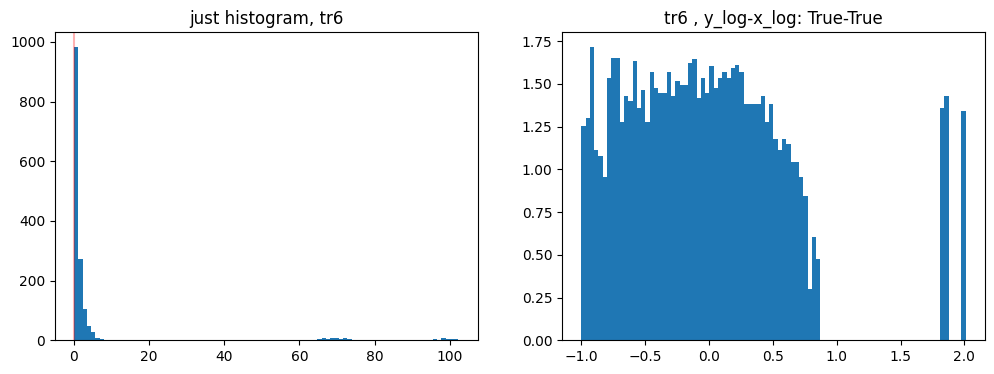

tr7 (1868, 8)


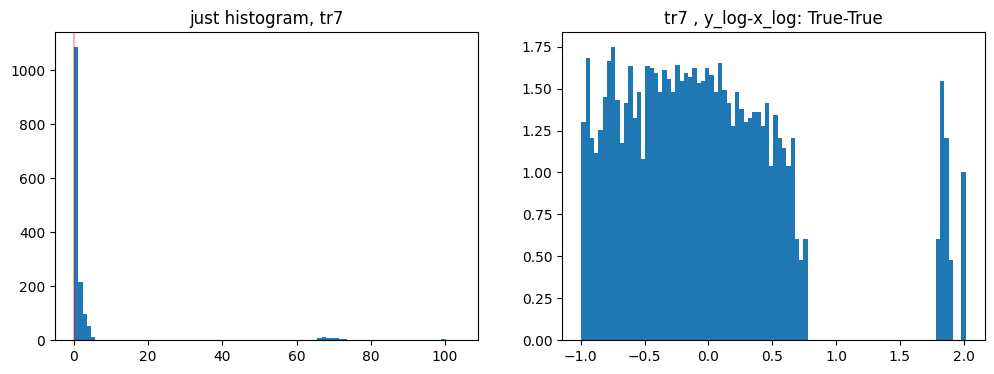

tr91 (1545, 8)


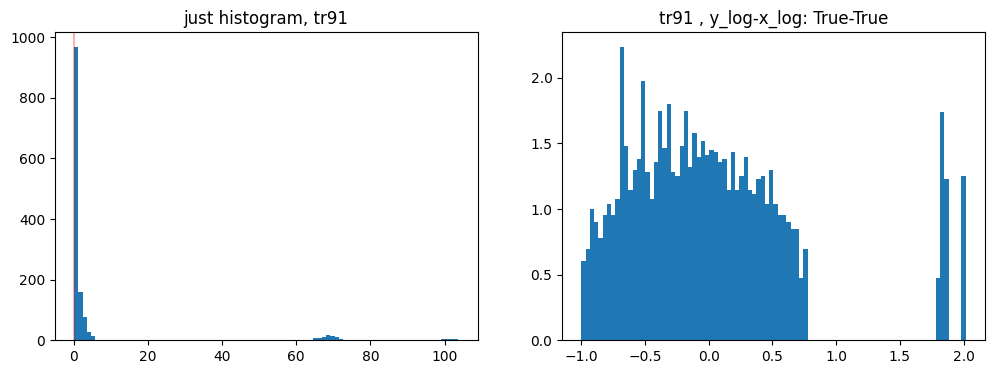

tr92 (460, 8)


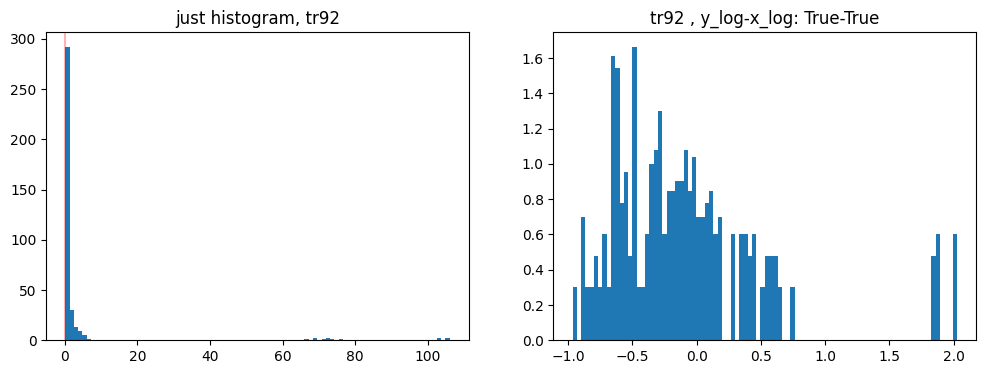

In [201]:
df_angls_hist = {}

for k, df in df_dict.items():
    df_in_area = df.loc[df['near_wall']>=10].copy()
    print(k, df_in_area.shape)

    plot_step_lens_hist(df_in_area, 90, k, y_log=True, x_log=True)

    # h = build_log_hist(df_in_area, binn=150, hist_title=f'{k}, area={area}',
    #                    y_log=True, x_log=False)

## проведем анализ walls

tr11 (2614, 8)


/tmp/ipykernel_13213/2113354128.py:24: RuntimeWarning: divide by zero encountered in log10
  hist = np.log10(hist)


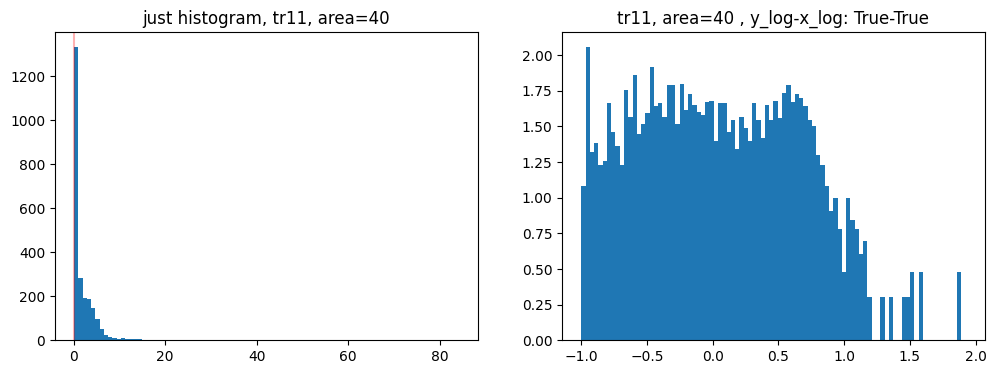

tr12 (2663, 8)


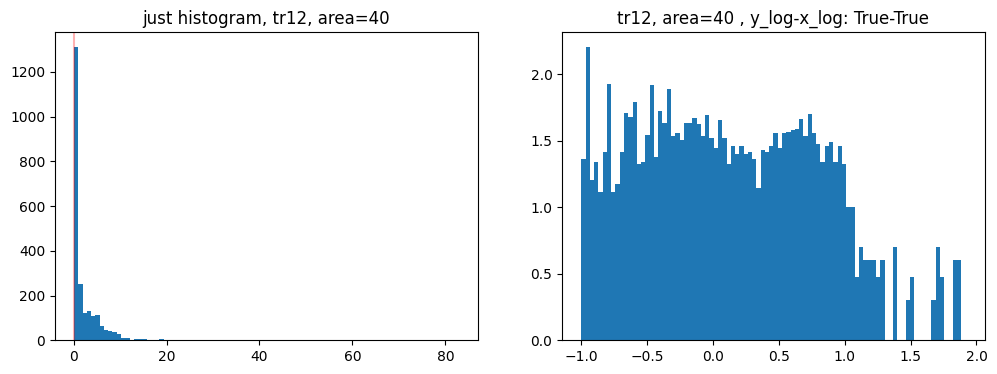

tr2 (2739, 8)


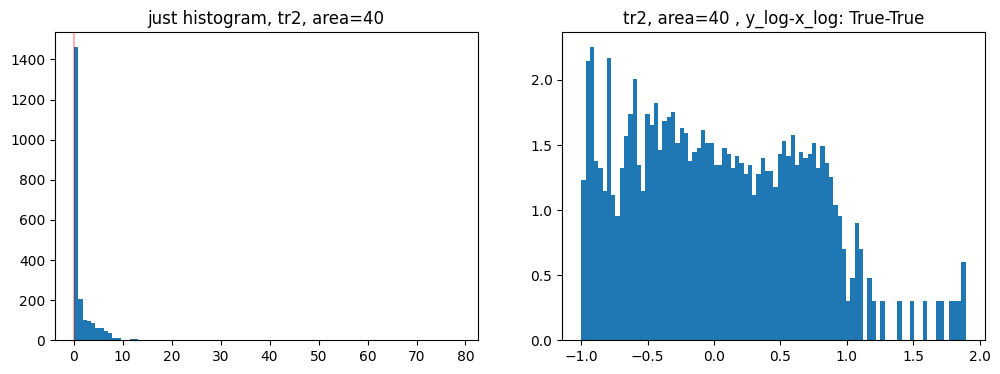

tr3 (1338, 8)


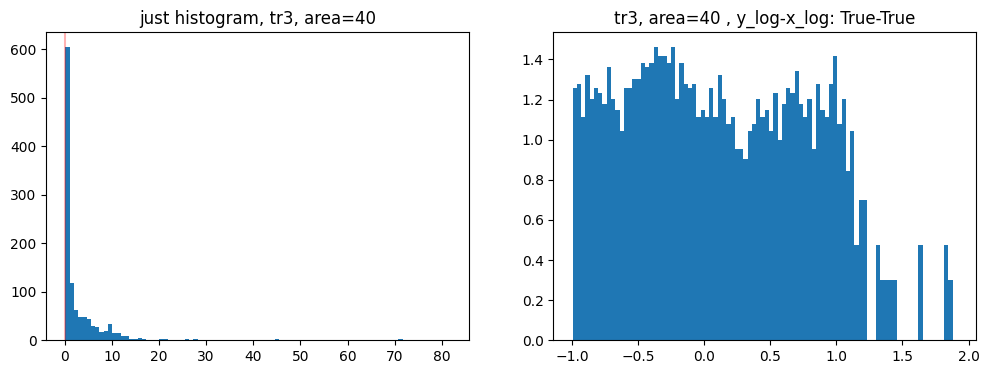

tr4 (344, 8)


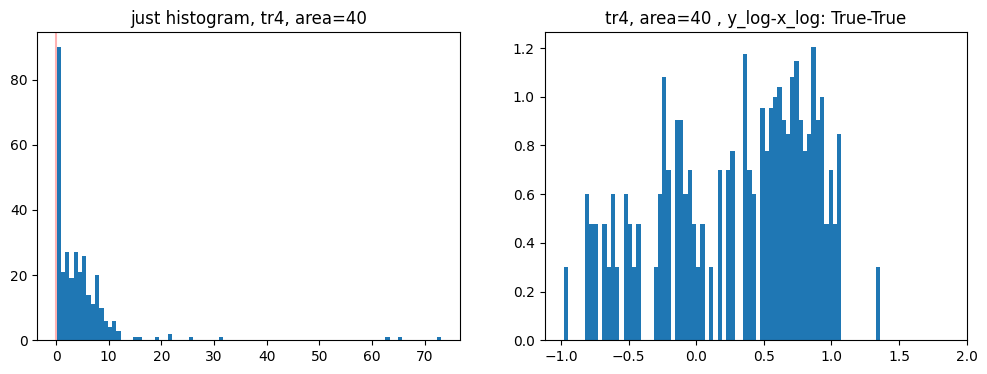

tr5 (1315, 8)


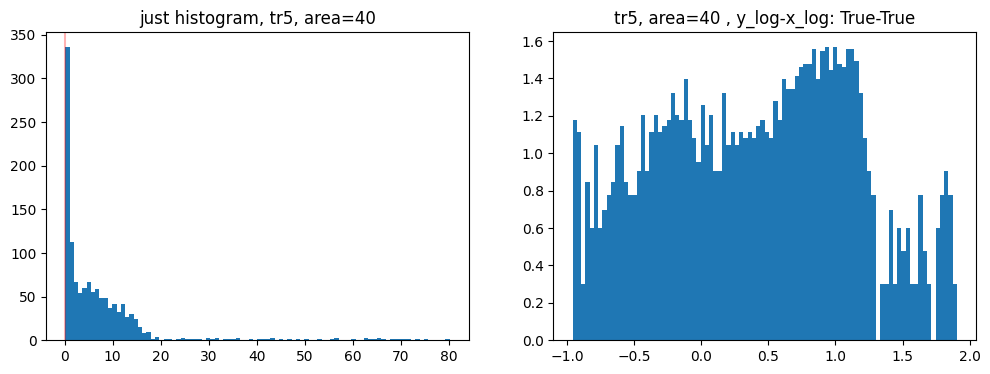

tr6 (2370, 8)


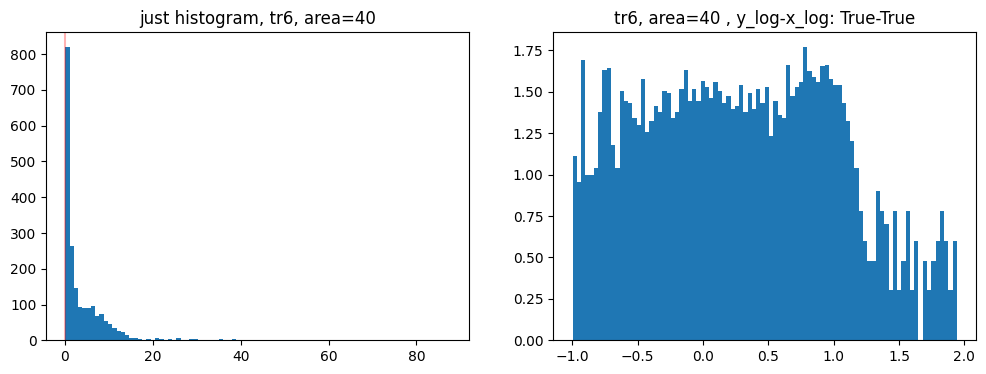

tr7 (2207, 8)


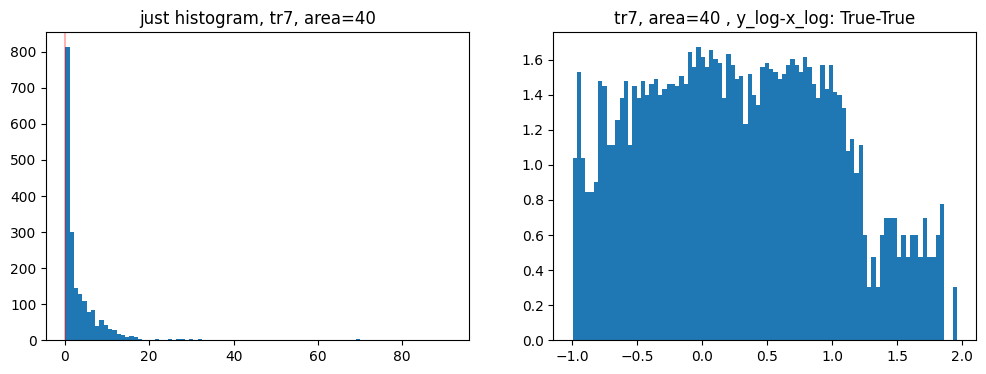

tr91 (3456, 8)


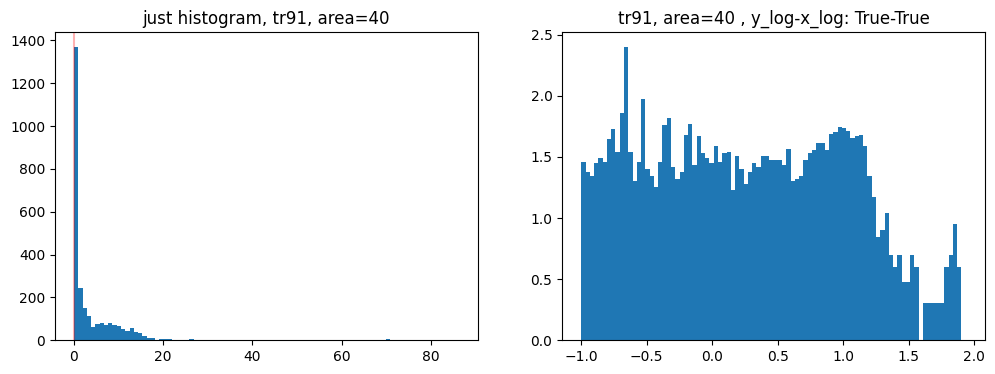

tr92 (3929, 8)


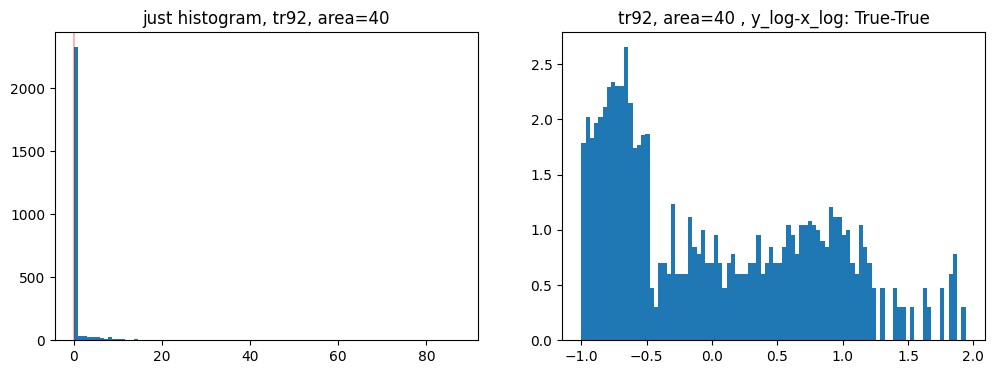

In [202]:
df_angls_hist = {}

for k, df in df_dict.items():
    df_in_area = df.loc[(df['near_wall']>=1) & (df['near_wall']<=4)].copy()
    print(k, df_in_area.shape)

    plot_step_lens_hist(df_in_area, 90, f'{k}, area={area}', y_log=True, x_log=True)

    # h = build_log_hist(df_in_area, binn=150, hist_title=f'{k}, area={area}', scale_log=True)

# Fit and Save distributions of center, walls, corners